# **TELCO CUSTOMER CHURN PREDICTION USING ARTIFICIAL NEURAL NETWORK**

NAME  : RAIHAN RAFIF

BATCH : HCK-001

# **I. INTRODUCTION**

Customers are one of the important variables in a business. Businesses will not run without customers who are the target market and are definitely the main source of income for a business in all sectors. Churn and customer retention are two important factors in customer monitoring. In general, churn can be interpreted as a condition in which one or more customers leave a product or service from a business within a certain time. While retention has the opposite meaning, where one or more customers stay to use a product or service from a particular business. Monitoring of these two factors related to customers is very important, especially to maintain the company's income so that it is stable and even increases. There are many factors or variables that can influence a customer to leave a product or service from a business. These factors can be analyzed to determine what factors have the greatest influence so that prevention and service improvements can then be carried out in order to prevent customer churn from multiplying.

Telco Company is a company in California, the USA which is engaged in Home Phone and Internet Services. Telco Co. recorded to date has a total of 7043 customers. Based on the total number of existing customers, of course, there are customers who are retention and customers who churn. Several other data were also included to analyze their influence. In general, the variables contained in the data of Telco Co. customer data are customer churn, information services, such as phone, multiple lines, online security, online backup, device protection, tech support, streaming TV and movies, etc and demographic information, such as gender, and if they have partners and dependents, etc.

## **1. Objective**

Comparing Artificial Neural Network (ANN) models using sequential APIs and functional APIs to predict customer churn that occurs within a certain time becomes the main objective to be carried out. The deployment will also be carried out using the best-generated model.

# **II. EXPLORATORY DATA ANALYSIS (EDA)**

## **1. Importing Libraries**

In [1]:
# General Libraries for generating dataset
import pandas as pd
import numpy as np

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For feature correlation
import phik
from phik.report import plot_correlation_matrix

# For data normalization and standarization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# For preporcessing pipeline architechture
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For target data imbalanced handling
from imblearn.over_sampling import SMOTENC
from collections import Counter

# For modeling problems
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# For model evaluation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# For model deployment
import pickle

# For ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Loading The Data**

The dataset is obtained through the following link below:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&language=Python

In [2]:
# Loading the data
df = pd.read_csv(r"h8dsft_M1P2_raihan_rafif.csv")

# Setting maximum display to show all columns
pd.set_option("display.max_columns", None)

# Showing head and tail of the data
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Showing shape of the data
df.shape

(7043, 21)

The Telco Company Dataset has 21 features consisting of numeric and categorical data, as well as 7043 total population of customer data.

## **3. Data Dictionary**

|Variable|Type|Description|Values|
|:-------|:---|:----------|:------|
|customerID|Object|A unique ID that identifies each customer|Unique|
|gender|Categorical|The customer’s gender|Male, Female|
|SeniorCitizen|Boolean|Indicates if the customer is 65 or older|1 : Yes, 0 : No|
|Partner|Categorical|Whether the customer has a partner or not|Yes, No|
|Dependents|Categorical|Whether the customer has dependents or not|Yes, No|
|tenure|Integer|Number of months the customer has stayed with the company|Months|
|PhoneService|Categorical|Whether the customer has a phone service or not|Yes, No|
|MultipleLines|Categorical|Whether the customer has multiple lines or not|Yes, No, No phone service|
|InternetService|Categorical|Customer’s internet service provider|DSL, Fiber optic, No|
|OnlineSecurity|Categorical|Whether the customer has online security or not|Yes, No, No internet service|
|OnlineBackup|Categorical|Whether the customer has online backup or not|Yes, No, No internet service|
|DeviceProtection|Categorical|Whether the customer has device protection or not|Yes, No, No internet service|
|TechSupport|Categorical|Whether the customer has tech support or not|Yes, No, No internet service|
|StreamingTV|Categorical|Whether the customer has streaming TV or not|Yes, No, No internet service|
|StreamingMovies|Categorical|Whether the customer has streaming movies or not|Yes, No, No internet service|
|Contact|Categorical|The contract term of the customer|Month-to-month, One year, Two year|
|PaperlessBilling|Categorical|Whether the customer has paperless billing or not|Yes, No|
|PaymentMethod|Categorical|The customer’s payment method|Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)|
|MonthlyCharges|Float|The amount charged to the customer monthly|USD|
|TotalCharges|Float|The total amount charged to the customer|USD|
|Churn|Categorical|Whether the customer churned or not|Yes, No|

## **4. Explorations**

In [4]:
# Elimination unnecessary column
df.drop(["customerID"], axis = 1, inplace = True)

customerID is the unique ID of each data, so it is considered not to have any input value for the model that will be created later. Thus, it was decided to remove it before the dataset was used to create the model.

In [5]:
# Displaying general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


There are 20 remaining features which are divided into category data and numeric data. It can be seen at a glance that all data has value and there is no missing data seen from the Non-Null Count in general information.

In [6]:
# Changing column type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)

In [7]:
df["SeniorCitizen"].replace(["0", "1"], ["No", "Yes"], inplace = True)

In [8]:
df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, "Yes", "No")

In [10]:
# Displaying statistical information of the numerical data
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In general, there are three features in the form of numerical data. The three features have normal statistical descriptions when viewed at the minimum, maximum, median, and mean values. Although SeniorCitizen is numeric data, in fact, the data is boolean data with a value of 0/1, so it can be said that the feature is a categorical feature that has been encoded. Moreover, at a glance based on the value of the central tendency, the total charges data seems to have outliers.

In [11]:
# Identifying duplicates data
dpl = df[df.duplicated(keep = "first")]

# Showing shape of the duplicates data
dpl.shape

(26, 20)

There are 22 data indicated as duplicate data. In addition, the number of data identified as duplicate data is 22 data. Based on the total data, it means that only 0.0031% of the data is duplicate data. This duplicate data will be eliminated in order to avoid disturbances when generating training models. In addition, the omission of duplicate data here is because the percentage of duplicate data is so minor that it will not affect the distribution of the dataset itself.

In [12]:
# Eliminating duplicates data
df.drop_duplicates(keep = "first", inplace = True)

In [13]:
# Reseting index
df.reset_index(drop = True, inplace = True)

In [14]:
# Showing shape of the data
df.shape

(7017, 20)

In [16]:
# Generation visualization function
def count(df, variable):
    # Sets figure size
    plt.figure(figsize = (10, 6))
    # Set seaborn plotting aesthetics as default
    sns.set()
    # Histogram
    count = sns.countplot(data = df,
                    x = variable,
                    hue = df["Churn"],
                    palette = "rocket_r"
    )
    plt.title("Data Distribution", fontsize = 20)
    # Showing count number
    count.bar_label(count.containers[0], label_type = "edge")
    count.bar_label(count.containers[1], label_type = "edge")
    # Showing the plot
    plt.show()
    
def pie(df):
    # Setting figure size
    plt.figure(figsize = (15, 11))
    # Set seaborn plotting aesthetics as default
    sns.set()
    # Defining colors, explotion, and labels
    explode = (0.025, 0.025)
    data = df["Churn"]
    colors = ["salmon", "mediumvioletred"]
    labels = ["No", "Yes"]
    # Creating pie chart
    plt.pie(data.value_counts(),
        labels = labels,
        colors = colors,
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 90,
        pctdistance=0.85,
        explode = explode
    )
    #draw circle
    centre_circle = plt.Circle((0,0), 0.50, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Setting title
    plt.title("Data Persentation", fontsize = 20)
    # Showing the plot
    plt.show()

def hist(df, x, y):
    # Setting figure size
    plt.figure(figsize = (10, 6))
    # Sets seaborn aesthetics as default
    sns.set()
    # Bar plotting
    bar = sns.barplot(data = df,
                      x = x,
                      y = y,
                      order = pd.value_counts(df[x]).iloc[::].index,
                      palette = "rocket_r",
                      ci = None
    )
    # Showing count number
    bar.bar_label(bar.containers[0], label_type = "edge")
    # Setting title and labels
    plt.title("Data Correlation", fontsize = 20)
    # Showing the plot
    plt.show()

In [17]:
# Assigning categorical columns
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'Contract', 'StreamingMovies',
                'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity',
                'InternetService', 'MultipleLines', 'DeviceProtection', 'PaymentMethod']

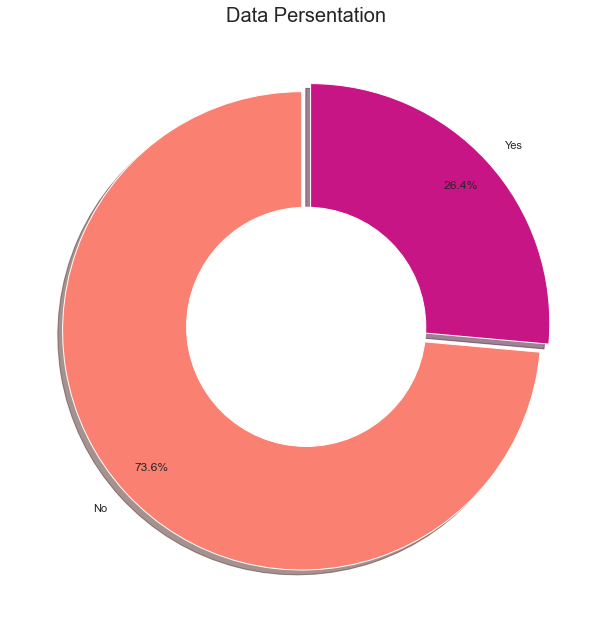

In [18]:
# Target data plot
pie(df)

Customer churn is data that will later be used as a prediction target in the modeling that will be carried out. 26.4% of the total 7021 customers are churn customers. While 73.6% are retention customers. Based on this visualization, it can be ascertained that the target data is not evenly distributed. This is very common. The main focus of this analysis is to determine the main variables that have a high impact on customer churn so that it can be used as a basis for taking policies and prevention to minimize the amount or percentage.

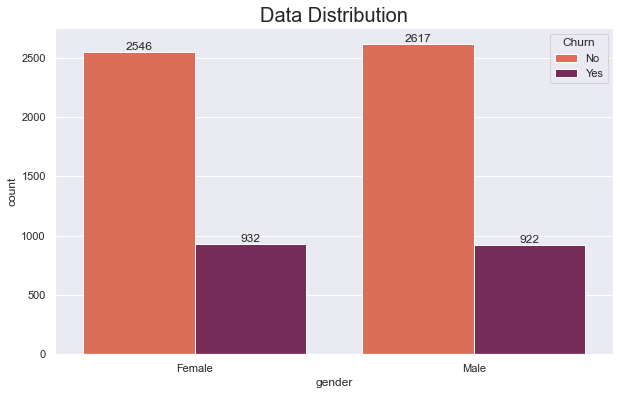

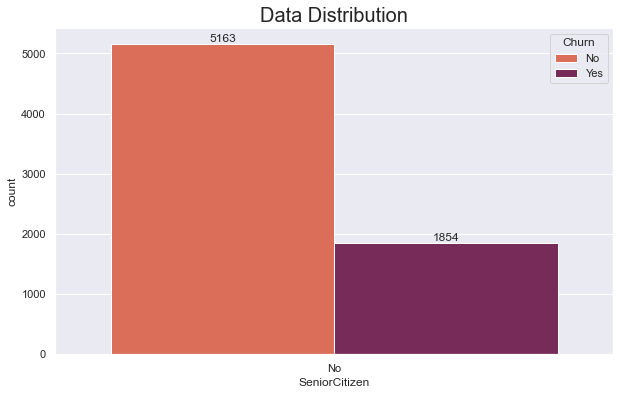

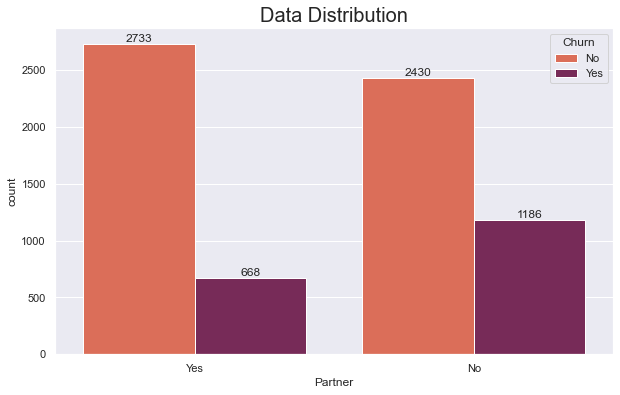

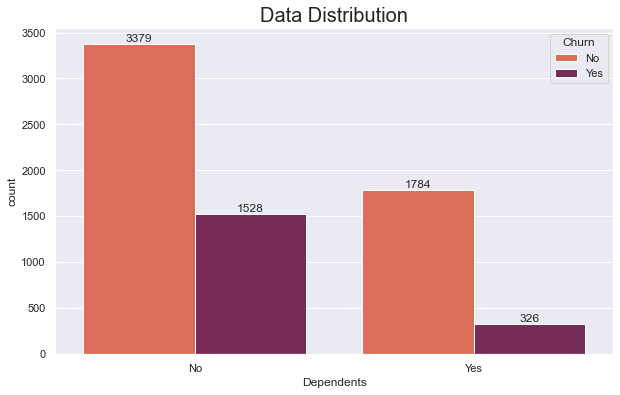

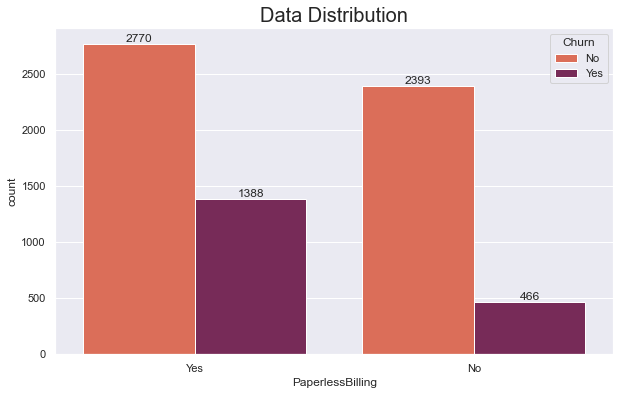

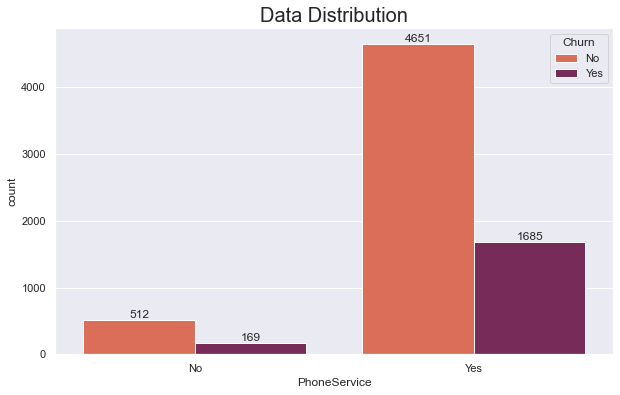

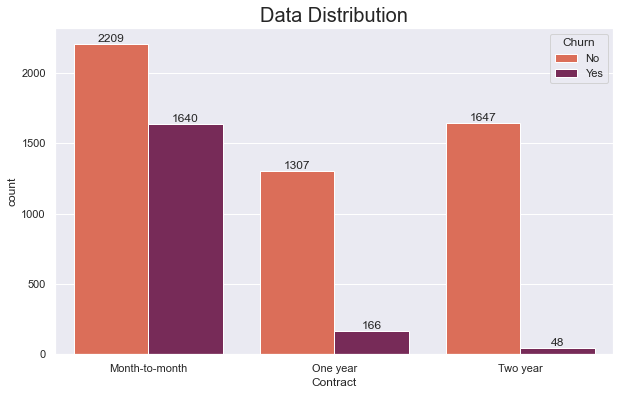

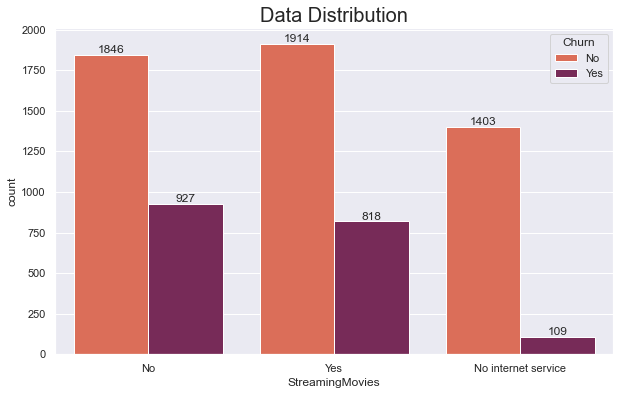

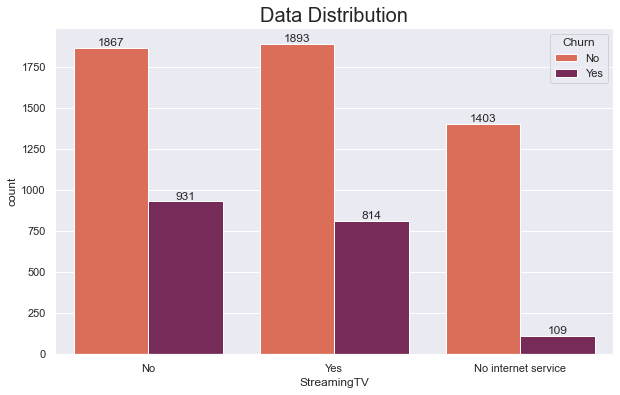

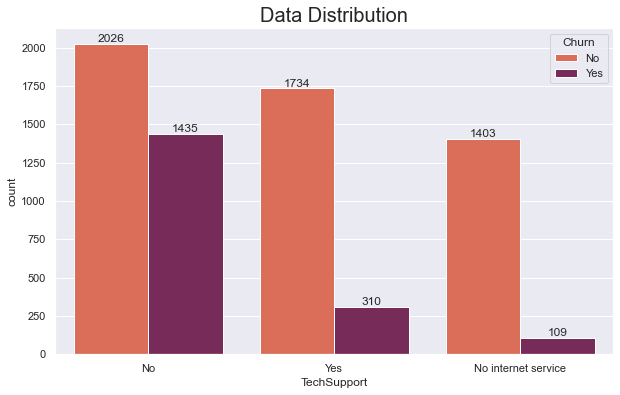

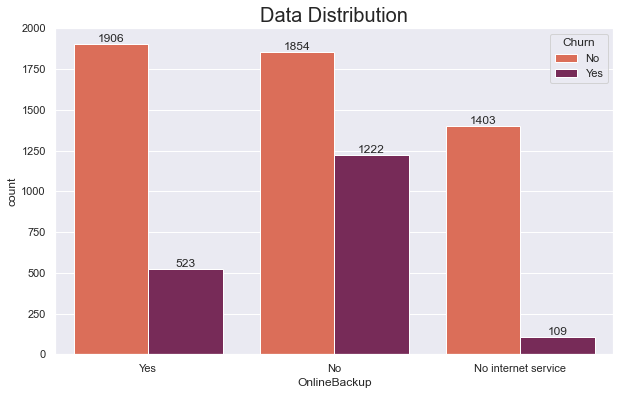

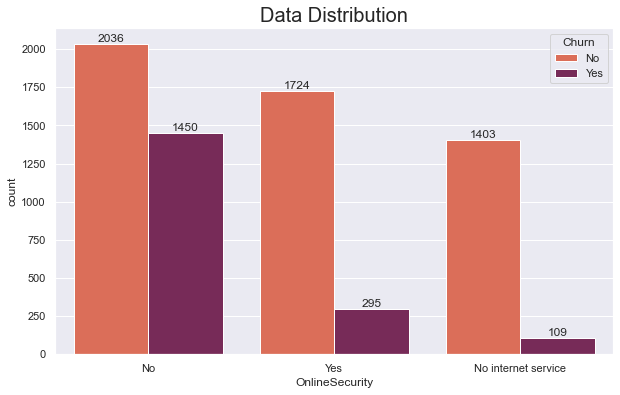

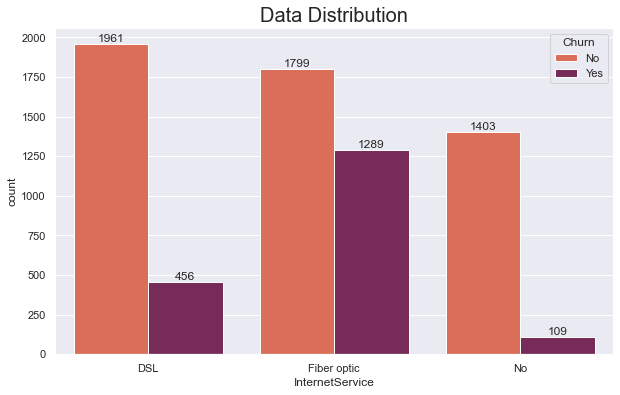

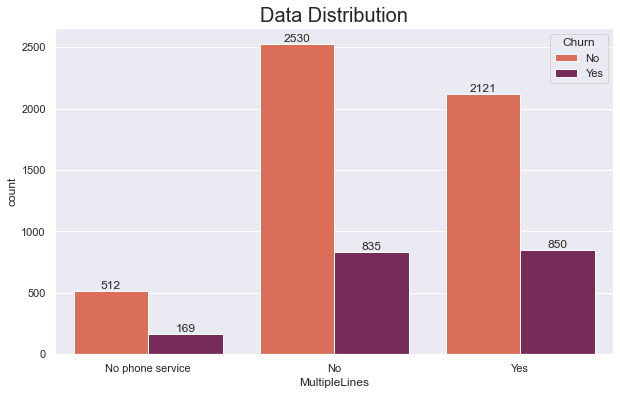

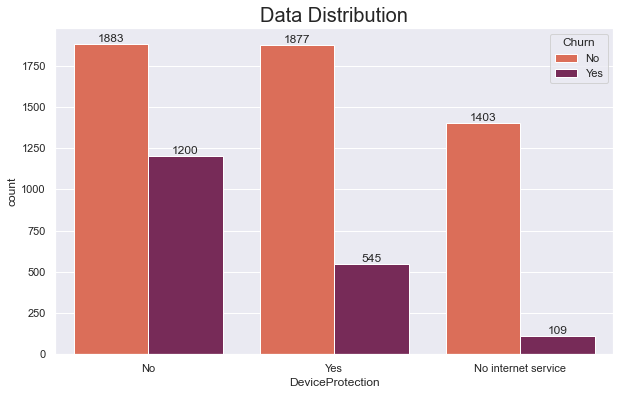

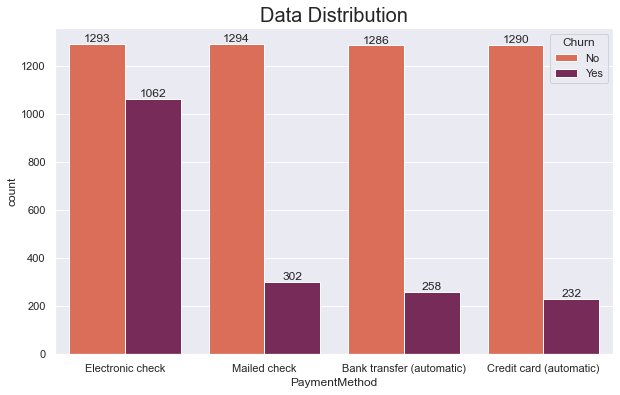

In [19]:
# Categorical features plot
for col in cat_features:
    count(df, col)

Based on gender, male customers and female customers have an equal percentage. It can be seen that churn customers in both genders are in the range of 35% of the total number of customers in each gender category. Meanwhile, if we look at the senior citizen data, which shows whether the customer is a customer over the age of 65 or not. It can be seen that the majority of customers are under 65 years old (84%). Phone and Internet Services usually target users with middle to upper income with productive age. Thus, it is natural that users under the age of 65 dominate. This also means that the market focus should be more targeted at this category. Then when viewed based on the partner category, here it is seen that a person's marital status does not have a significant effect on their tendency to use the products or services of this business. However, it can be seen that customers who are single or have no partners tend to have a higher churn percentage (8% higher) than married customers. This means that customers who already have a partner or are married usually tend to seek stability in life, so the possibility of switching services as long as there are no problems, which is significantly smaller than customers who are still single. Similar to the partner category, independent customers are much more likely to become churn customers than dependent customers. In addition, customers with paperless billing have a higher churn tendency than customers with paper billing.

Based on the services received by its customers, there are far more customers with phone service than customers who do not use phone services. So it is quite biased when compared to the two classes directly. However, in general, the two classes have almost the same churn potential when viewed from the percentage in each class. Based on the duration of the contract, it can be seen here that the longer the contract duration between Telco Co. with the customer, the less likely churn will occur. This is evidenced by the very high churn in the customer class with a month-to-month contract duration when compared to other types of contracts with a duration of one or two years at a time. However, for TV and Movie streaming services, it can be seen that the presence or absence of these services in the contract taken by the customer does not have a significant effect on the percentage of churn that occurs. This is inversely proportional to the existence of technical support, online backup, online security, and device protection. Customers who do not receive technical support, online backup, online security, and device protection tend to have a much higher churn percentage than customers who receive these services. This means that these four services are quite influential and must be improved to attract more customer retention.

Internet service is certainly one of the mainstay products where the more users, the more benefits the company will get. Based on the internet service, there are two types of services, namely DSL and fiber optic. Meanwhile, users without internet service will be ignored here. Although customers without internet service have a small churn, it is not true that the solution taken is to not offer internet service products. Thus, the focus of the analysis here lies in the other two categories. Users with this type of fiber optic internet service have a much higher churn tendency than users with DSL internet service. So, as much as possible make a marketing strategy to persuade customers without internet service and customers with fiber optic internet service to use DSL. This is inversely proportional to the category of multiple lines. The number of phone services did not have a significant effect on the churn percentage of customers directly. Based on the payment method, customers who pay by electronic check have a much higher churn percentage compared to customers who make payments by the other three methods (mailed check, bank transfer, and credit card).

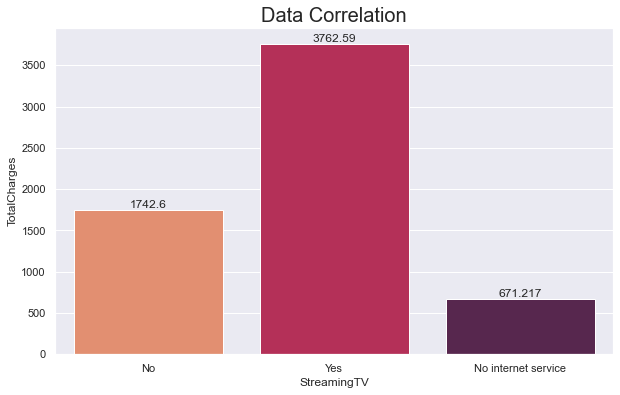

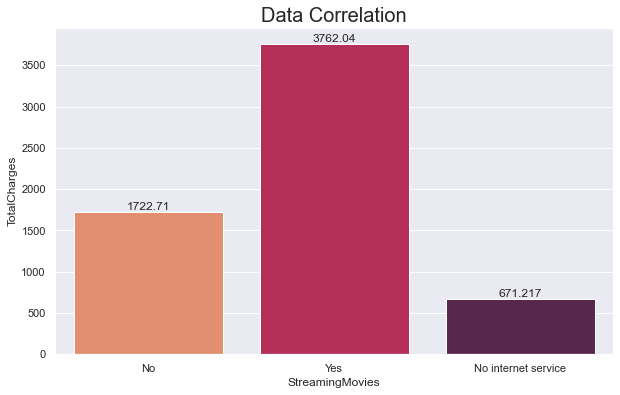

In [20]:
# Numerical plot
hist(df, "StreamingTV", "TotalCharges")
hist(df, "StreamingMovies", "TotalCharges")

Based on the visualization above, customers with TV and movie streaming services have higher total charges compared to customers who do not take the service package. This means that the more customers who use TV and Movie streaming services, the higher the company's revenue will be.

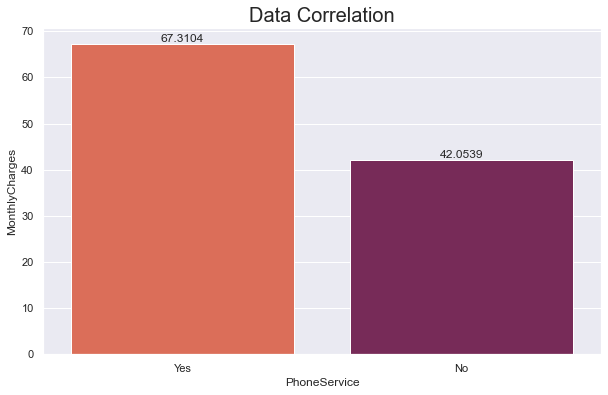

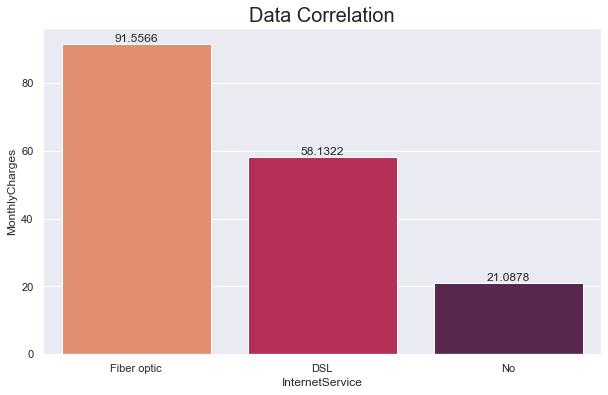

In [21]:
# Numerical plot
hist(df, "PhoneService", "MonthlyCharges")
hist(df, "InternetService", "MonthlyCharges")

Customers with phone service and internet service, in general, will definitely have higher expenses or bills. However, if we look at the internet service category, it was previously explained that customers with DSL internet service have a lower churn tendency compared to fiber optic. Apparently, fiber optic users have a much higher monthly bill than DSL users. This may be one of the main causes, of the loss of customers using fiber optics. This fact reinforces the company's need to take a stronger marketing approach to attract customers to use DSL instead of fiber optic.

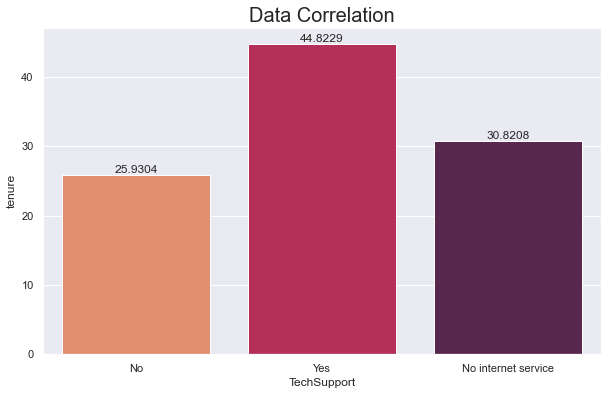

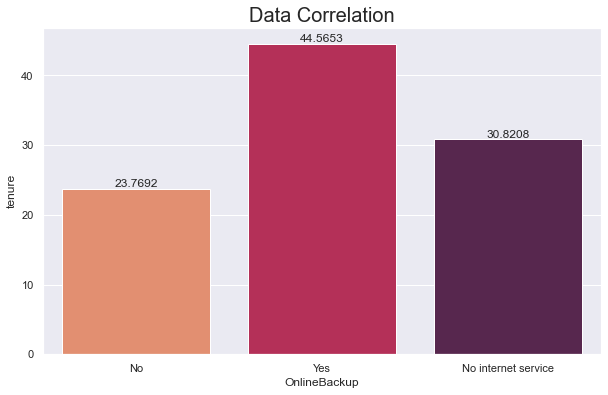

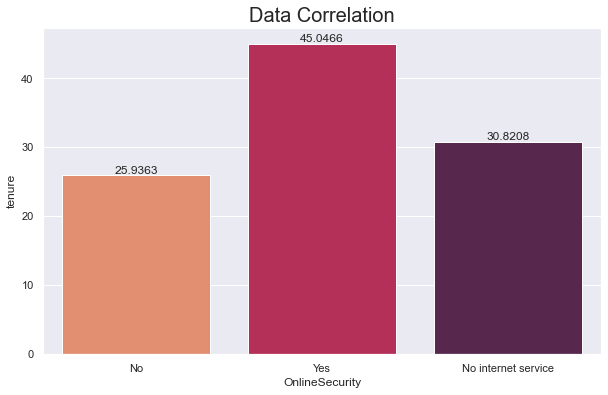

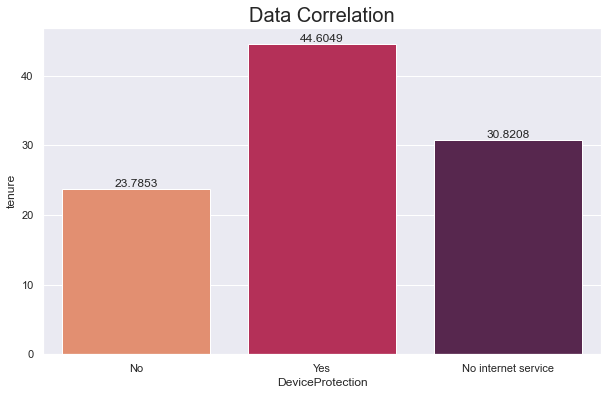

In [22]:
# Numerical plot
hist(df, "TechSupport", "tenure")
hist(df, "OnlineBackup", "tenure")
hist(df, "OnlineSecurity", "tenure")
hist(df, "DeviceProtection", "tenure")

Based on the previous analysis, it is known that technical support, online backup, online security, and device protection services are crucial services that affect the potential for customer churn. It turns out, based on the visualization above, customers who receive these services have a high tenure tendency. That is, they are customers who use Telco Co's products or services for a longer time than other customers. This can indicate a marketing loophole. Attractive offers related to these four services can be used as weapons to attract new customers or customers who do not yet have loyalty to trust Telco Co. and minimize the occurrence of more customer churn.

# **III. DATA PREPROCESSING**

## **1. Inference Data Ectraction**

In [23]:
# Slicing the first 10 rows for making the inference data
df_inf = df.sample(10, random_state = 42)
# Showing the inference data
df_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2997,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
3977,Female,No,No,No,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,837.95,Yes
245,Male,No,No,No,4,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,75.35,273.40,No
1467,Male,No,No,No,37,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,Yes
1835,Female,No,No,No,4,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.30,116.95,No


In [24]:
# Dropping the inference data from the model data
df = df.drop(df_inf.index)

In [25]:
# Reset Index
df.reset_index(drop = True, inplace = True)

In [26]:
# Reset Index
df_inf.reset_index(drop = True, inplace = True)

## **2. Missing Values Handling**

In [27]:
# Identifying possible missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 data with NaN values in the Total Charges feature. Based on the percentage of data compared to the total population, the data is very small. If the handling of missing values is done by capping the data, it is feared that it will affect the distribution of the dataset used. So it was decided to trim the data that contains missing values.

In [28]:
# calling out all rows that contains missing values
df[df.isnull().any(axis = 1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
487,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
752,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
935,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1080,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1337,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3317,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3810,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4360,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5196,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6638,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [29]:
# dropping missing values from the dataset
df.dropna(inplace = True)

## **3. Training, Testing, and Validation Data Separation**

In [30]:
# Train and test split using stratified split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Churn'), df['Churn'], train_size = 0.8, stratify = df['Churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.75, stratify = y_train)

In [31]:
# Reset the index
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [32]:
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Validation Size : ', X_val.shape)

Train Size :  (4197, 19)
Test Size  :  (1400, 19)
Validation Size :  (1399, 19)


## **4. Outliers Handling**

In [33]:
# Function to create histogram and boxplot
def diagnostic_plots(X_train, variable):
    # Sets figure size
    plt.figure(figsize = (20, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins = 30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = X_train[variable])
    plt.title('Boxplot')

    plt.show()

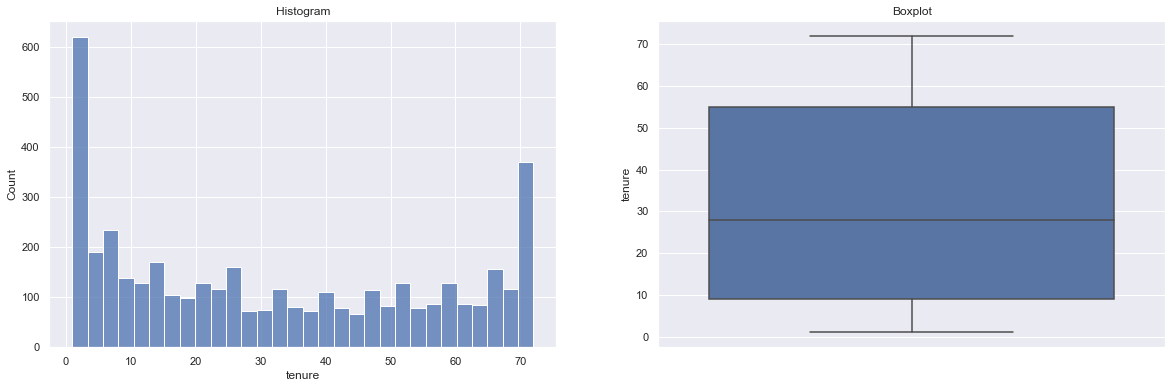


Skewness Value :  0.26196589594489156


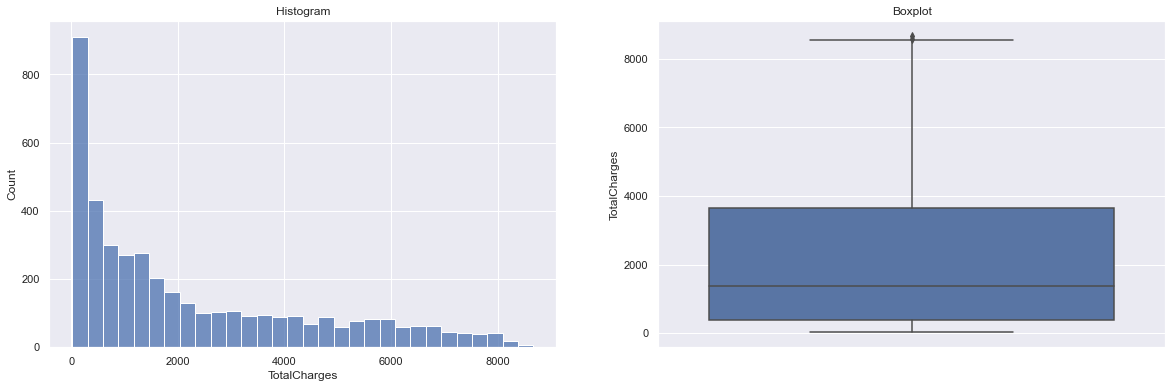


Skewness Value :  0.993932695526686


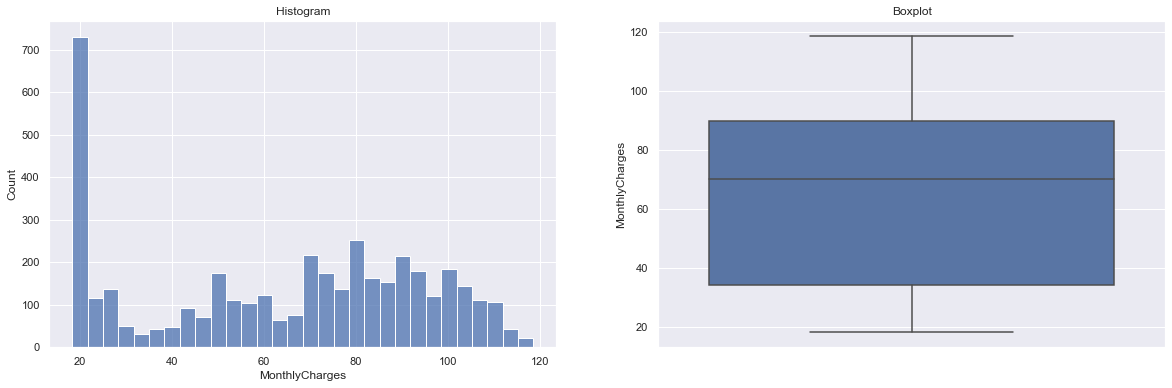


Skewness Value :  -0.2008745615728089


In [34]:
# Tenure data distribution
diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())
# Total charges data distribution
diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())
# Monthly charges data distribution
diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

In [35]:
# Making iqr function
def find_normal_bound(data, feature):
    normal_lower_bound = data[feature].mean() - 3 * data[feature].std()
    normal_upper_bound = data[feature].mean() + 3 * data[feature].std()

    return normal_lower_bound, normal_upper_bound

In [36]:
# Finding data boundaries
lower_tenure, upper_tenure = find_normal_bound(X_train, 'tenure')
lower_total, upper_total = find_normal_bound(X_train, 'TotalCharges')
lower_monthly, upper_monthly = find_normal_bound(X_train, 'MonthlyCharges')

print('The low boudaries of tenure feature :', lower_tenure)
print('The high boundaries of tenure feature :', upper_tenure)
print('The low boudaries of total charges feature :', lower_total)
print('The high boundaries of total charges feature :', upper_total)
print('The low boudaries of monthly charges feature :', lower_monthly)
print('The high boundaries of monthly charges feature :', upper_monthly)

The low boudaries of tenure feature : -41.20572334230259
The high boundaries of tenure feature : 105.34725300634834
The low boudaries of total charges feature : -4494.295762503994
The high boundaries of total charges feature : 8969.398288117527
The low boudaries of monthly charges feature : -26.347371680340146
The high boundaries of monthly charges feature : 154.6994803293752


Based on the results of the visualization of the distribution of numerical data above, it is known that the three numerical data are normally distributed. Then, the Z-score is used to see the boundaries of each feature. The three data do not have outliers, so preprocessing can be continued to the next stage.

## **5. Feature Selection**

Phik (𝜙k) is a practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependencies and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution. The use of the phik matrix is based on several advantages, including it is based on several refinements to Pearson's chi-squared contingency test, a hypothesis test for independence between two or more variables, it works consistently between categorical, ordinal, and interval variables, it captures non-linear dependencies, it reverts to Pearson's correlation coefficient in the case of a bivariate normal distribution of the input, and the algorithm contains a built-in noise reduction technique against statistical fluctuations.

(source : https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)

In [98]:
# Correlation overview
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Partner,0.0,1.00,0.65,0.49,0.03,0.09,0.00,0.09,0.09,0.10,0.08,0.08,0.08,0.18,0.01,0.24,0.20,0.42,0.23
Dependents,0.0,0.65,1.00,0.21,0.00,0.01,0.11,0.12,0.10,0.09,0.11,0.09,0.09,0.15,0.17,0.22,0.19,0.11,0.25
tenure,0.0,0.49,0.21,1.00,0.00,0.37,0.00,0.37,0.40,0.40,0.36,0.32,0.33,0.67,0.00,0.37,0.41,0.84,0.47
PhoneService,0.0,0.03,0.00,0.00,1.00,1.00,0.28,0.11,0.10,0.10,0.11,0.11,0.11,0.00,0.02,0.00,0.83,0.20,0.00
MultipleLines,0.0,0.09,0.01,0.37,1.00,1.00,0.74,0.54,0.56,0.56,0.54,0.59,0.59,0.24,0.10,0.17,0.71,0.49,0.02
InternetService,0.0,0.00,0.11,0.00,0.28,0.74,1.00,0.95,0.94,0.94,0.95,0.95,0.95,0.51,0.23,0.32,0.92,0.51,0.20
OnlineSecurity,0.0,0.09,0.12,0.37,0.11,0.54,0.95,1.00,0.95,0.95,0.95,0.94,0.94,0.64,0.21,0.31,0.81,0.53,0.21
OnlineBackup,0.0,0.09,0.10,0.40,0.10,0.56,0.94,0.95,1.00,0.95,0.95,0.95,0.95,0.58,0.19,0.29,0.82,0.57,0.18
DeviceProtection,0.0,0.10,0.09,0.40,0.10,0.56,0.94,0.95,0.95,1.00,0.95,0.95,0.95,0.63,0.19,0.29,0.83,0.57,0.17


Although Phik (𝜙k) can be used to see correlations with input data types in the form of categorical, ordinal, and interval, interval features must be defined first.

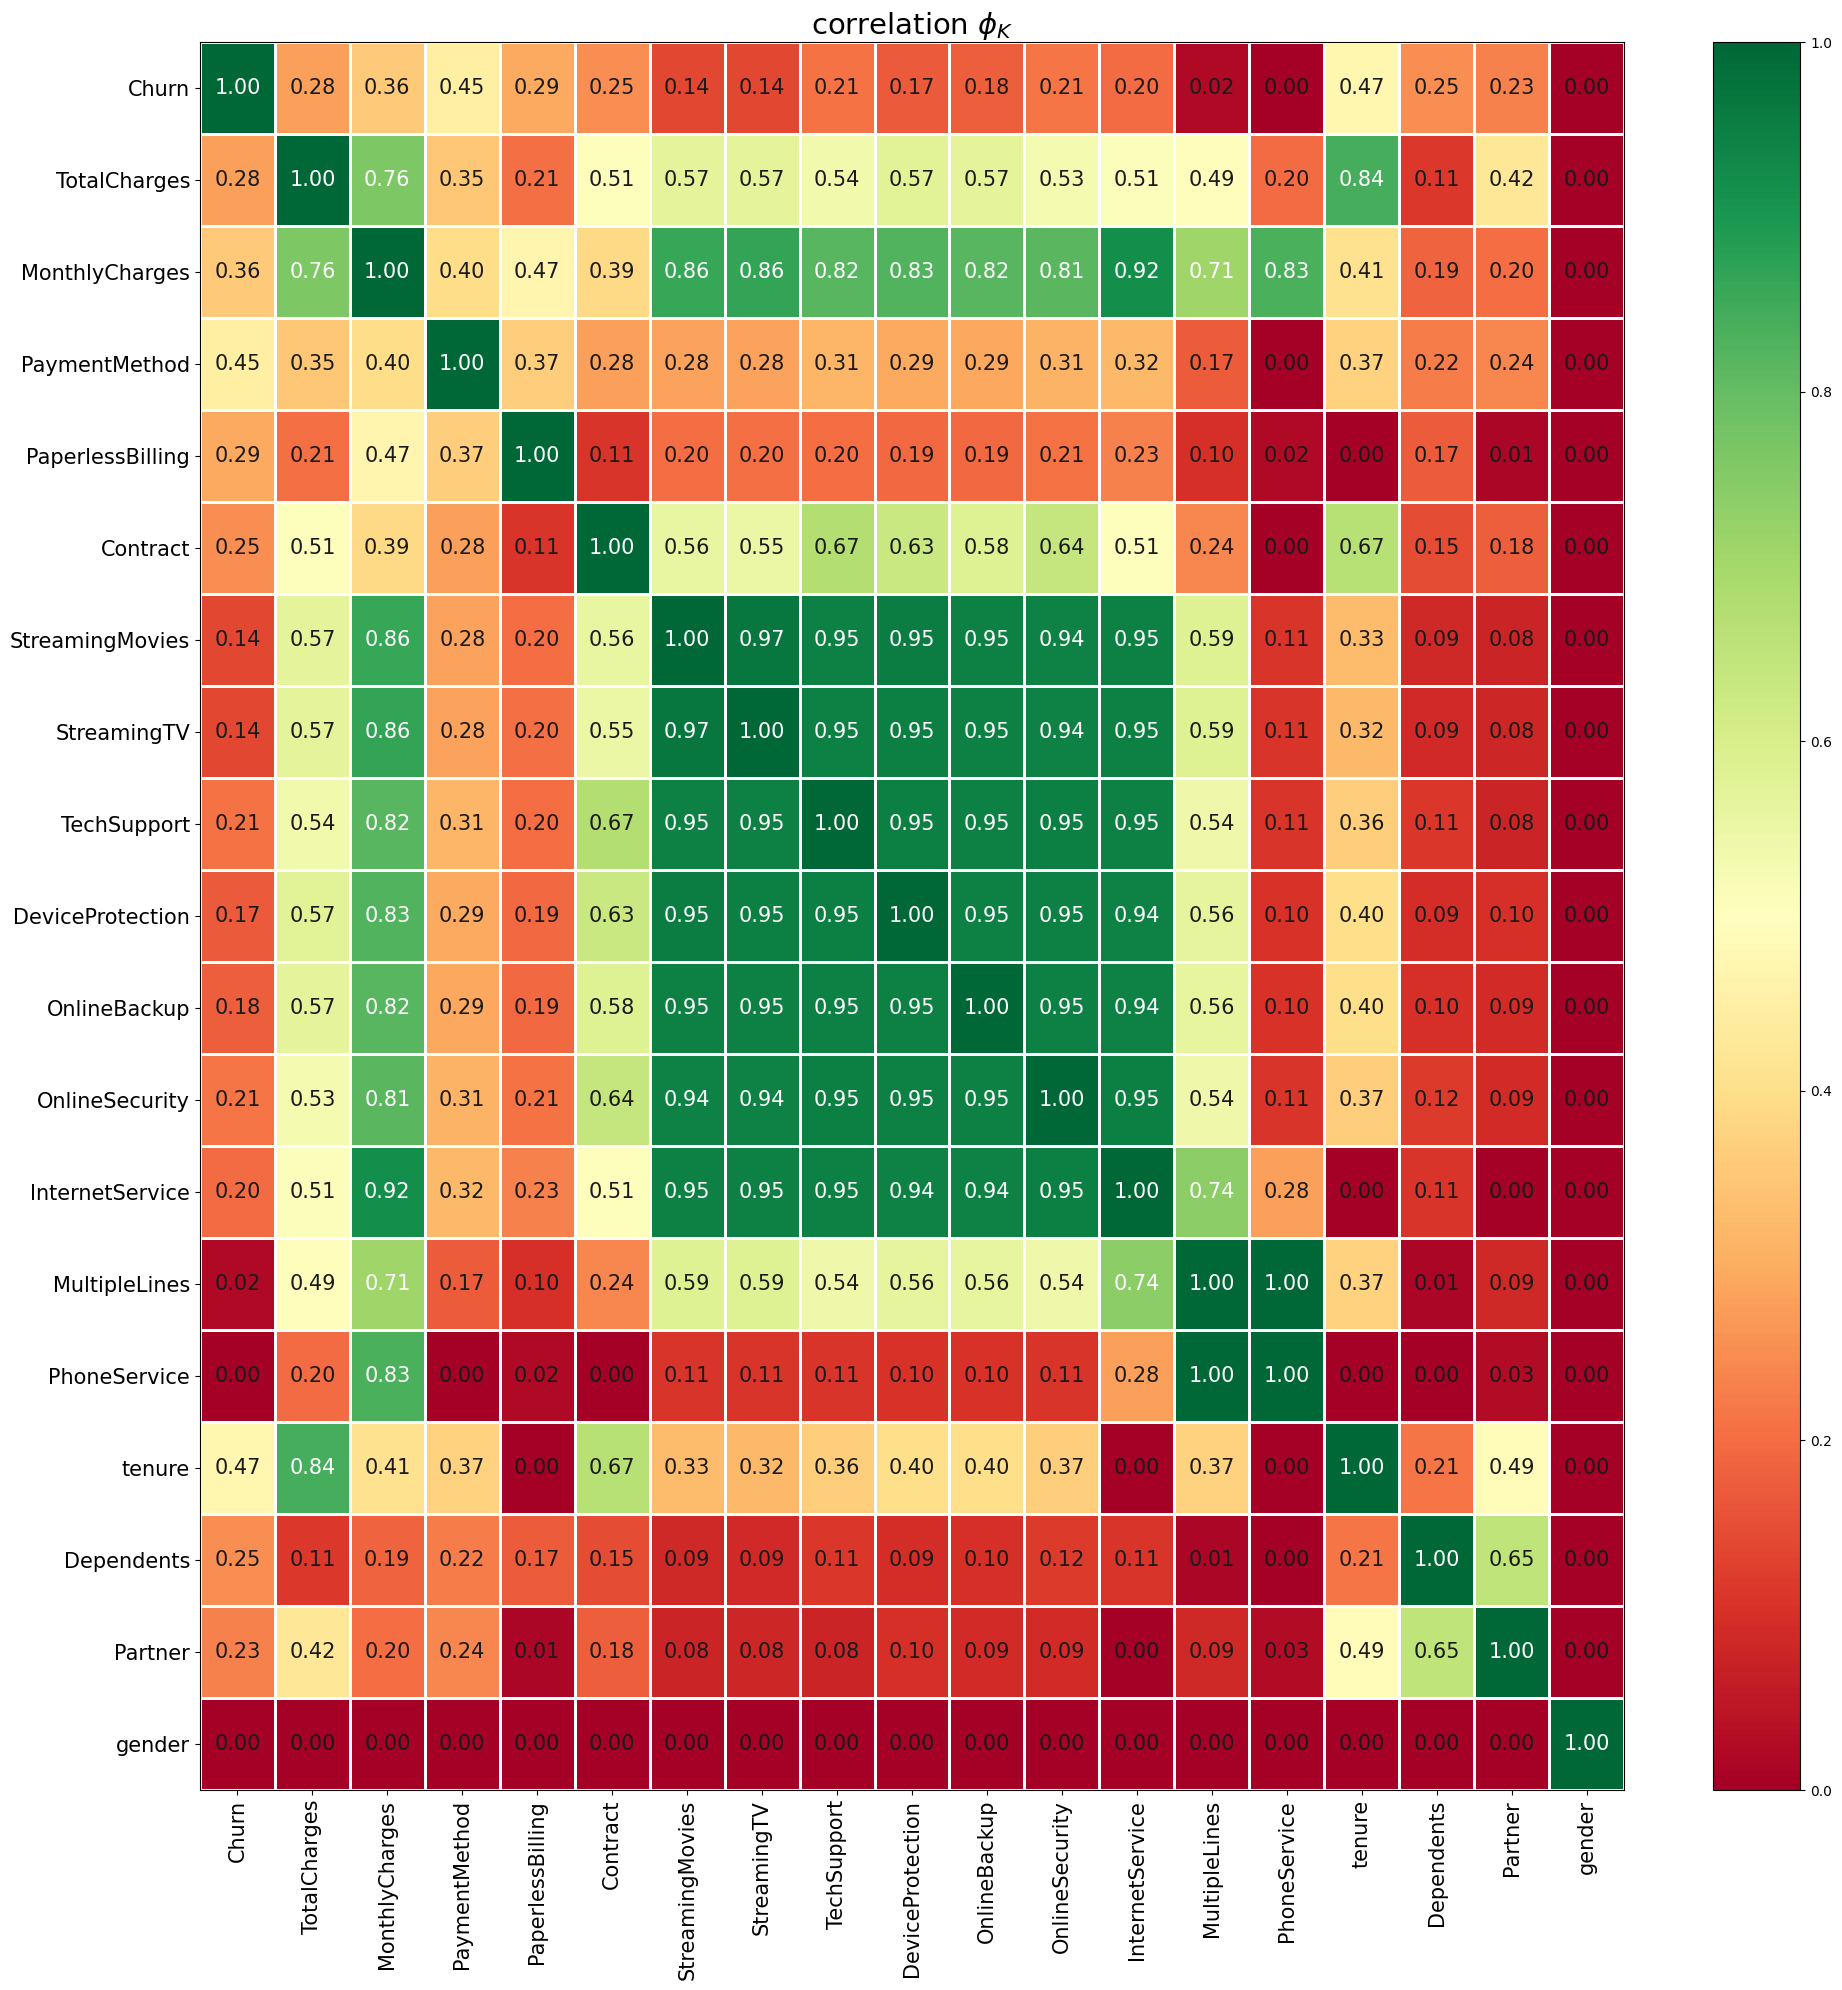

In [99]:
# Feature Correlation
# Defining interval features
interval_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# calculates the correlations
phik_overview = df.phik_matrix(interval_cols = interval_cols)
# Correlation plotting
plot_correlation_matrix(phik_overview.values,
                        x_labels = phik_overview.columns, 
                        y_labels = phik_overview.index, 
                        vmin = 0,
                        vmax = 1,
                        title = r"correlation $\phi_K$",
                        fontsize_factor = 1.5,
                        figsize = (20, 20)
)
plt.tight_layout()

When assessing correlations we should not only look at the coefficients but also at their statistical significance. Because in the end, a large correlation may be statistically insignificant, and vice versa.

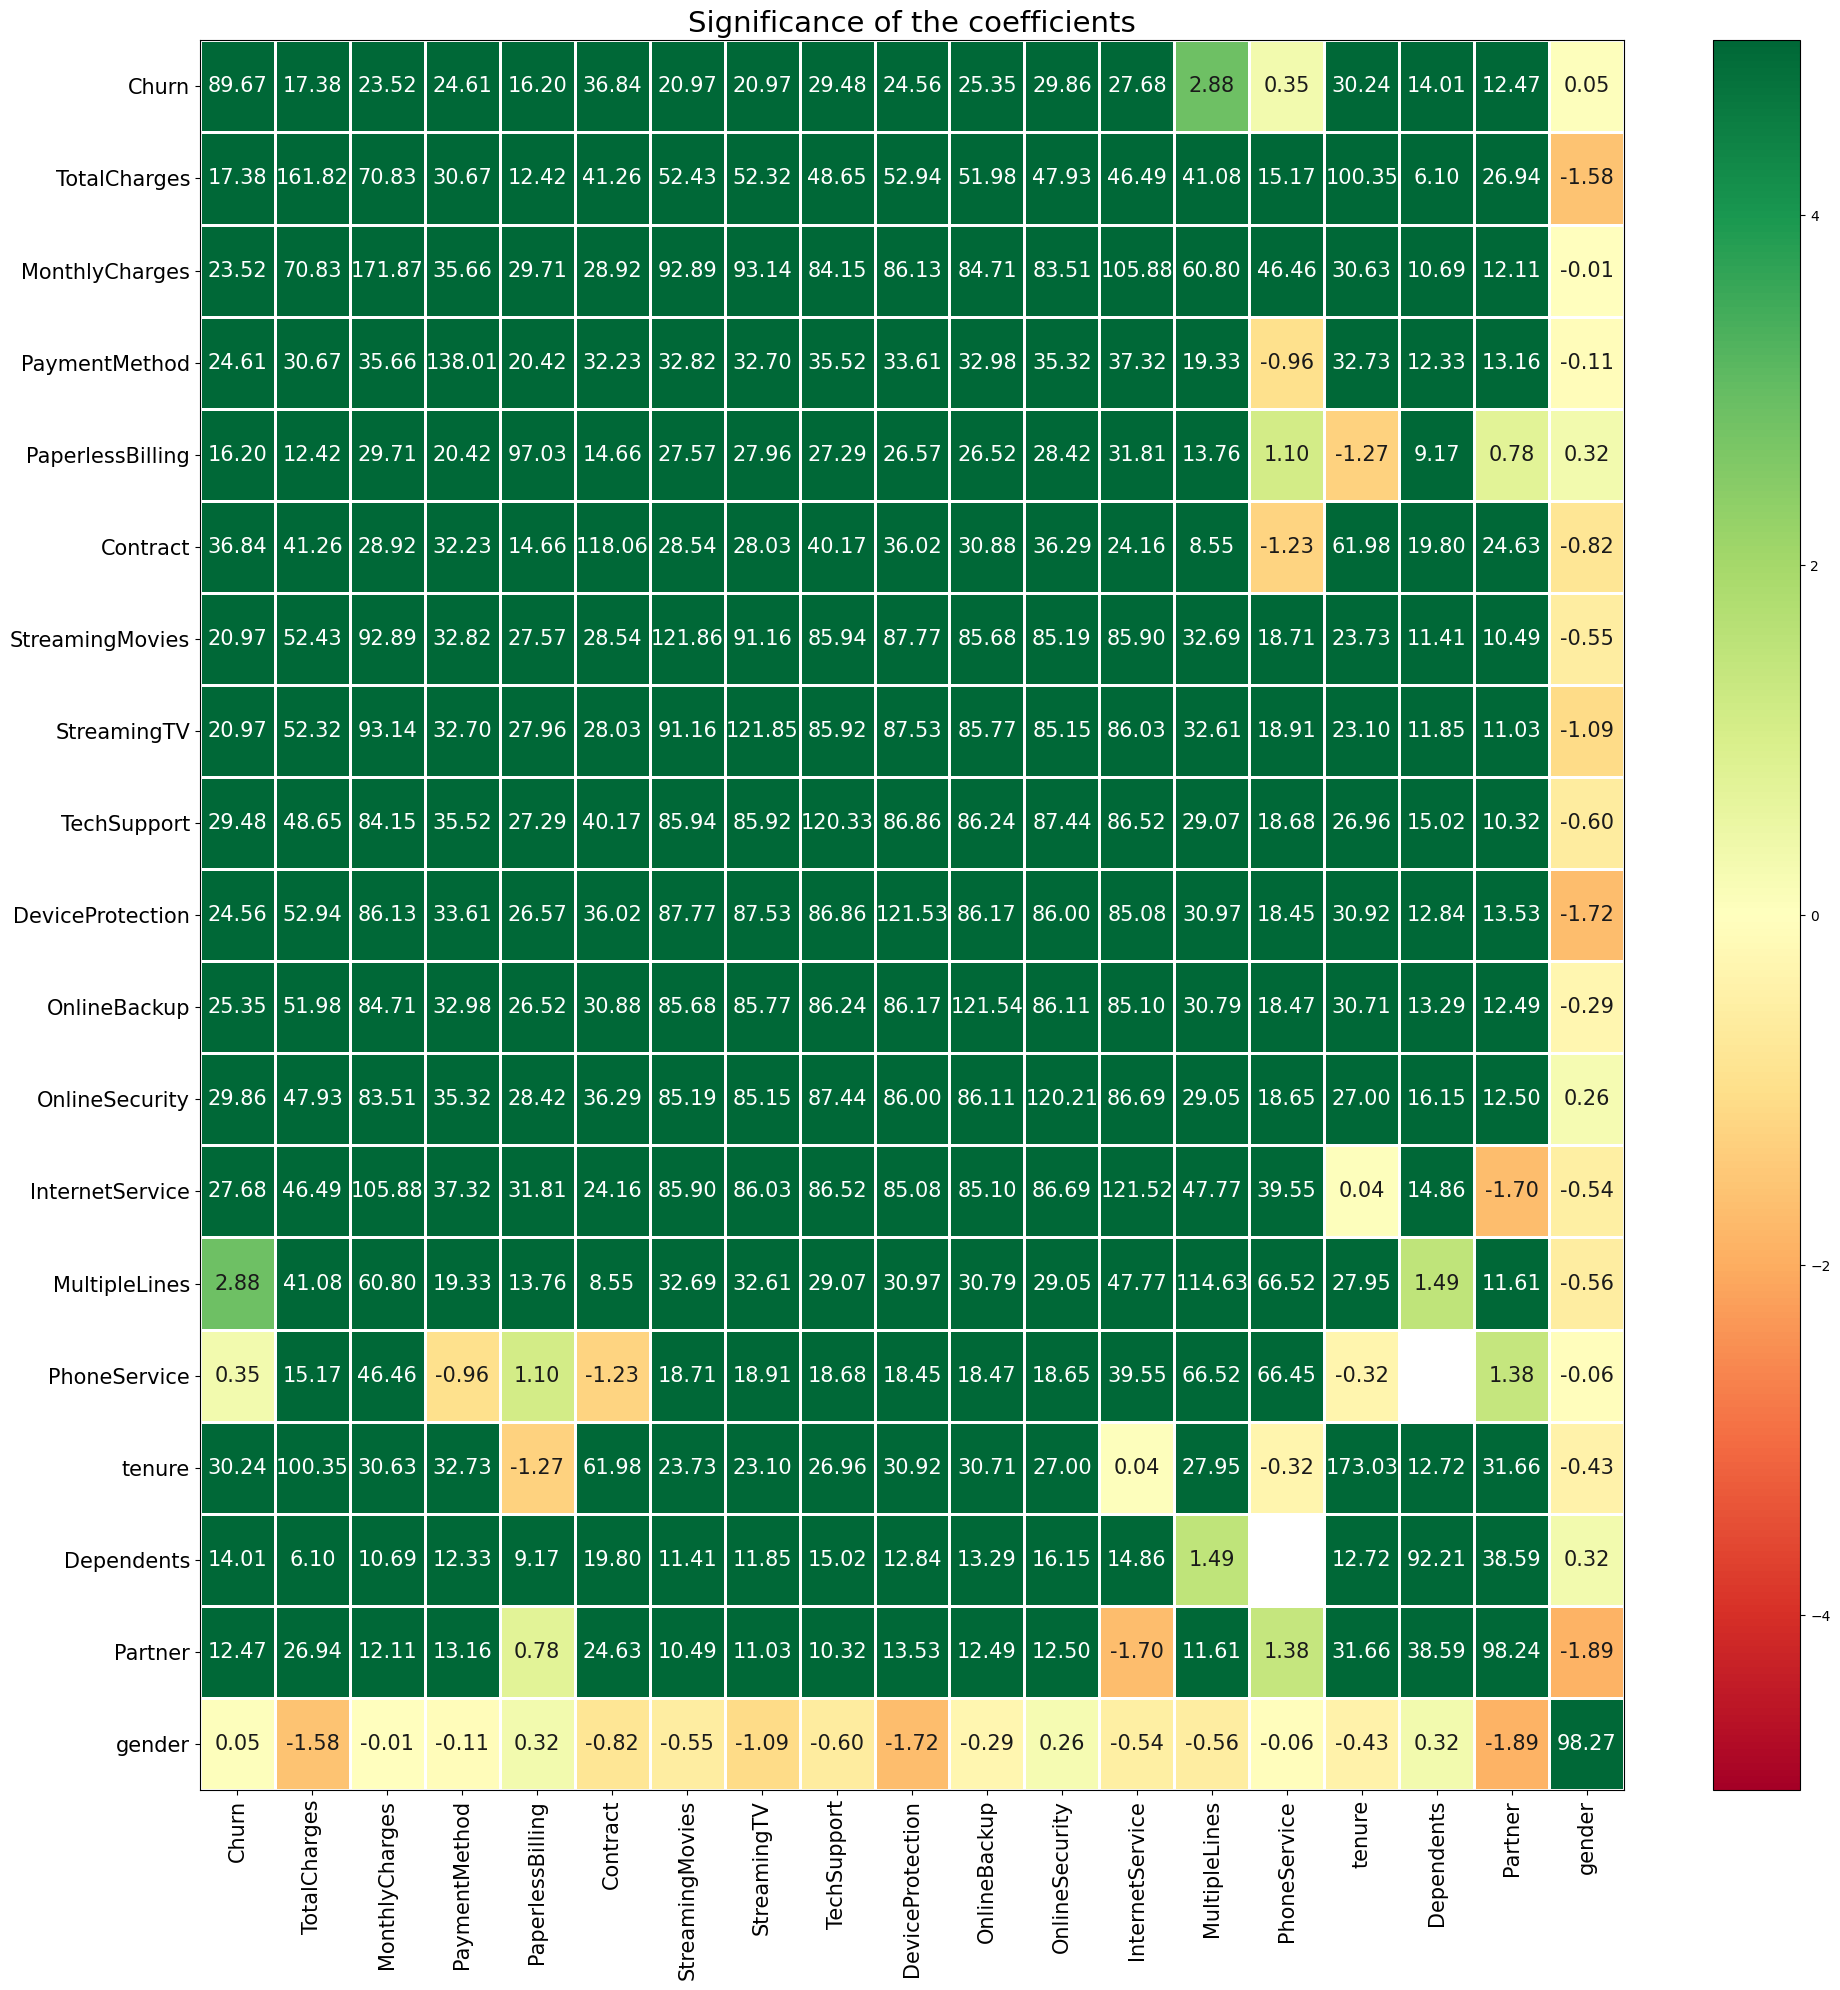

In [100]:
# Statistical significance
significance_overview = df.significance_matrix(interval_cols = interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels = significance_overview.columns, 
                        y_labels = significance_overview.index, 
                        vmin = -5,
                        vmax = 5,
                        title = "Significance of the coefficients", 
                        usetex = False,
                        fontsize_factor = 1.5,
                        figsize = (20, 20)
)
plt.tight_layout()

Significance is calculated based on the P-values between the two features. Therefore, the heatmap interval used is -5 to 5. When the P-value is between -5 to 5, it means that the feature is independent. Meanwhile, if the P-value is in the range outside -5 to 5, it means that the feature is a dependent feature.

Based on the results of correlation calculations using the Phik (𝜙k) matrix, it is known that there are several features that do not have a correlation with the target data, namely Churn. Based on the results of the overall correlation, the threshold for correlation is ≤ -0.2 or ≥ 0.2. There are several features that have a correlation below 0.2 and close to 0, such as gender, phone services, multiplelines, online backup, device protection, streaming TV, and streaming Movies. Gender, multiplelines, phone services, streaming TV, and streaming Movies themselves have a low correlation, their significance is also very low. Therefore, these three features will be eliminated before the model is created. Then, there are online backup features and device protection features which have a low correlation. However, both of these features are shown to have a trend that is indicated to have an effect on Churn in the previous visual analysis. This is also supported by the results of the calculation of the significance of these features. Although the two features have a correlation value below the predetermined threshold, their significance is quite high for Churn. So, it was decided that these two features would be kept. The same thing happened to the TV streaming and Movies streaming features, so it was decided that these two features would be kept.

In [37]:
# Eliminating unnacessary columns
X_train.drop(["gender", "MultipleLines", "PhoneService"], axis = 1, inplace = True)
X_test.drop(["gender", "MultipleLines", "PhoneService"], axis = 1, inplace = True)
X_val.drop(["gender", "MultipleLines", "PhoneService"], axis = 1, inplace = True)
df_inf.drop(["gender", "MultipleLines", "PhoneService"], axis = 1, inplace = True)

## **6. Data Scaling and Encoding**

In [38]:
# Separating numerical and categorical columns
num_columns = X_train.select_dtypes(include = np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [39]:
# Assigning numerical and categorical columns
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

In [40]:
X_train_num

,tenure,MonthlyCharges,TotalCharges
0,17,24.10,409.90
1,60,60.50,3694.45
2,39,50.75,2011.40
3,1,49.95,49.95
4,26,45.80,1147.00
...,...,...,...
4192,11,79.50,795.65
4193,24,81.00,1923.85
4194,61,98.30,6066.55
4195,34,85.20,2874.45


In [41]:
X_train_cat

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,No,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic)
2,No,No,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check
4,No,No,Yes,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,No,No,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
4193,No,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic)
4194,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Mailed check
4195,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic)


In [42]:
# Defining numerical and categorical columns
num_col = X_train_num.columns.values
cat_col = X_train_cat.columns.values
# Numerical column scaler
num_pipe = Pipeline([
    ('scaling', StandardScaler())
])
# Categorical column encoder
cat_pipe = Pipeline([
    ('encoding', OrdinalEncoder())
])

# Setting column transformer
preprocess = ColumnTransformer(transformers = [
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])
# Pipeline fitting
preprocess.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder())]),
                                 array(['SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'], dtype=object))])

In [43]:
# saving preprocess pipeline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

In [44]:
# Preprocessing pipeline transform
X_train_final = preprocess.transform(X_train)
X_test_final = preprocess.transform(X_test)
X_val_final = preprocess.transform(X_val)

In [45]:
# Assigning into dataFrame
X_train_final_df = pd.DataFrame(X_train_final)

# Showing final train dataFrame
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.617083,-1.328302,-0.814577,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0
1,1.143582,-0.121841,0.649334,0.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.283722,-0.445000,-0.100795,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
3,-1.272214,-0.471516,-0.975005,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,-0.248572,-0.609066,-0.486054,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0


In [46]:
# Labeling target data into numeric values
y_train = np.where(y_train == "Yes", 1, 0)
y_test = np.where(y_test == "Yes", 1, 0)
y_val = np.where(y_val == "Yes", 1, 0)

## **7. Imbalanced Data Handling**

In [47]:
# indeces of the columns of categorical variables
smnc = SMOTENC(sampling_strategy = 'auto',
               random_state = 121,
               categorical_features = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Resampling fit
X_train_final_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

# Showing counter values
counter = Counter(y_train_smnc)
print(counter)

Counter({1: 3088, 0: 3088})


## **8. TensorFlow Pipeline Architechture**

In [48]:
# Setting tensorFlow pipeline
# Train data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final_smnc, y_train_smnc))
train_dataset = train_dataset.shuffle(buffer_size = 2000).batch(64)

# Test data
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(64)

# Validation data
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(64)

# **IV. MODELING**

## **1. Functional**

**DEFINITION**

---

In [49]:
# Setting the number of neuron in hidden layer
n_neuronF = (21)

# Model architechture
n_feature = X_train_final.shape[1]
# Input layer
inp = Input(shape = (n_feature, ))
# Hidden layer
hidden_n = Dense(n_neuronF, activation = 'relu')(inp)
# Output layer
out = Dense(1, activation = 'sigmoid')(hidden_n) 
# Model definition
model_func = Model(inputs = inp, outputs = out)

In [67]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 21)                357       
                                                                 
 dense_1 (Dense)             (None, 1)                 22        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


**TRAINING**

---

In [68]:
# Compile functional model
model_func.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(), 
    metrics = ['accuracy']
)

In [69]:
# Training the model
historyF = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
97/97 [==============================] - 2s 4ms/step - loss: 0.7270 - accuracy: 0.5389 - val_loss: 0.6491 - val_accuracy: 0.5919
Epoch 2/100
97/97 [==============================] - 1s 9ms/step - loss: 0.5694 - accuracy: 0.7097 - val_loss: 0.5837 - val_accuracy: 0.6769
Epoch 3/100
97/97 [==============================] - 1s 9ms/step - loss: 0.5259 - accuracy: 0.7426 - val_loss: 0.5613 - val_accuracy: 0.6948
Epoch 4/100
97/97 [==============================] - 1s 12ms/step - loss: 0.5073 - accuracy: 0.7523 - val_loss: 0.5567 - val_accuracy: 0.6991
Epoch 5/100
97/97 [==============================] - 1s 6ms/step - loss: 0.4984 - accuracy: 0.7599 - val_loss: 0.5469 - val_accuracy: 0.7034
Epoch 6/100
97/97 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.7615 - val_loss: 0.5419 - val_accuracy: 0.7048
Epoch 7/100
97/97 [==============================] - 1s 5ms/step - loss: 0.4888 - accuracy: 0.7670 - val_loss: 0.5447 - val_accuracy: 0.7048
Epoch 8/100


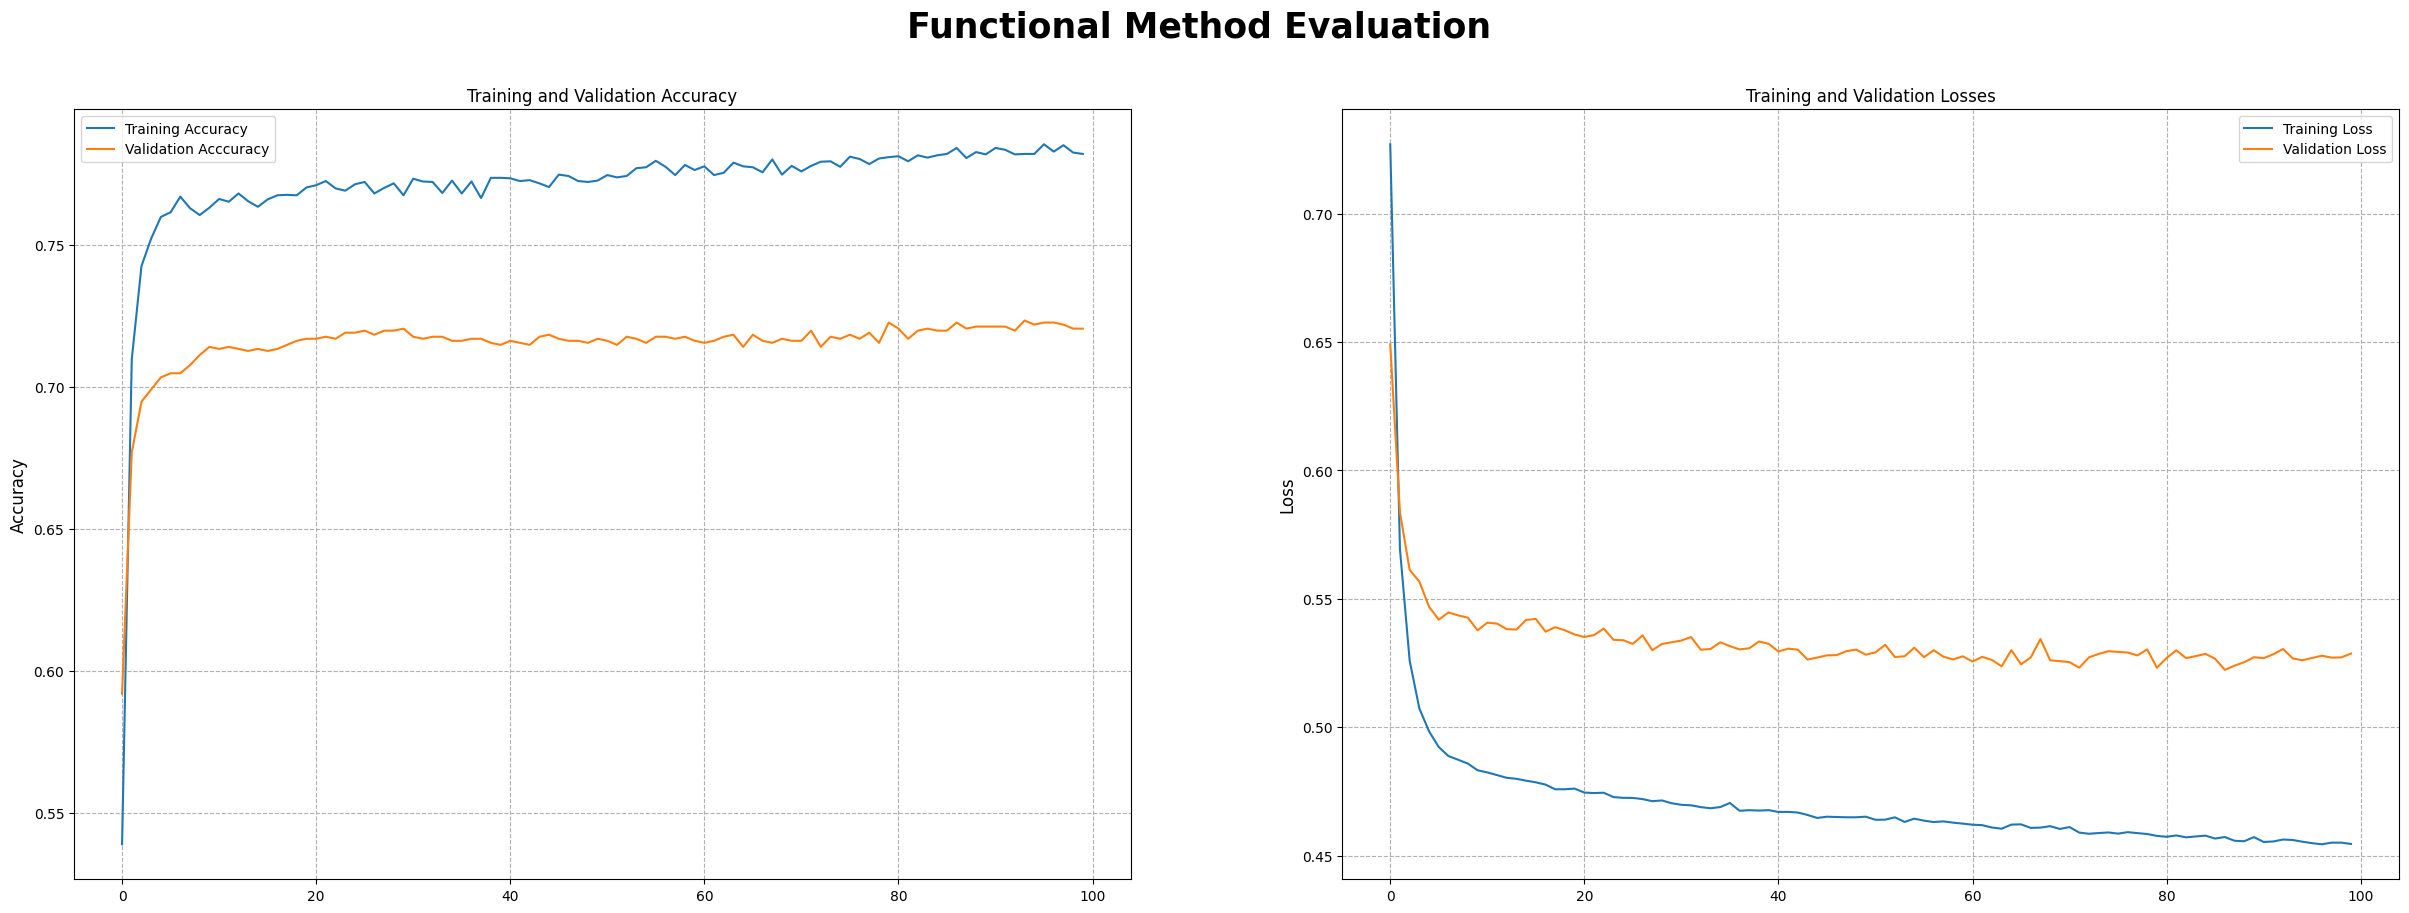

In [70]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(historyF.history['accuracy'], label = "Training Accuracy")
plt.plot(historyF.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(historyF.history['loss'], label = "Training Loss")
plt.plot(historyF.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

In [71]:
# predict probabilities
y_predF = model_func.predict(X_test_final)
# keep probabilities for the positive outcome only
y_predF = (y_predF > 0.4)

44/44 [==============================] - 0s 2ms/step


In [72]:
# Check accuracy score
print(f'model 1 accuracy score: {accuracy_score(y_test, y_predF > .5)}')

model 1 accuracy score: 0.6878571428571428


The following are the results of an Artificial Neuron Network that was built using a functional model, where the number of hidden layers used is 1 with a total of 21 neurons. Based on the loss and accuracy graph above, the model made still tends to be overfitting because the distance between the loss and accuracy lines is still quite wide even though it looks good. The accuracy score generated in this model is 0.687. The results of this functional ANN model have not been imported with hyperparameter settings. Thus, an import will be carried out to then compare the results.

## **2. Sequential**

**DEFINITION**

---

In [73]:
# Setting neuron
n_neuronS = (20)

# Sequential model definition
model_seq = Sequential()
# Input layer
model_seq.add(Input(shape = (n_feature, )))
# Hidden layer
model_seq.add(Dense(n_neuronS, activation = 'relu'))
# Output layer
model_seq.add(Dense(1, activation = 'sigmoid'))

In [74]:
# Model summary
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                340       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


**TRAINING**

---

In [75]:
# Compile model
model_seq.compile(optimizer = tf.keras.optimizers.Adamax(),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy']
)

In [76]:
# Training the model
historyS = model_seq.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
97/97 [==============================] - 2s 5ms/step - loss: 0.6075 - accuracy: 0.6673 - val_loss: 0.5914 - val_accuracy: 0.7076
Epoch 2/100
97/97 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7325 - val_loss: 0.5675 - val_accuracy: 0.7091
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7437 - val_loss: 0.5544 - val_accuracy: 0.7134
Epoch 4/100
97/97 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.7516 - val_loss: 0.5555 - val_accuracy: 0.7012
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7539 - val_loss: 0.5507 - val_accuracy: 0.7069
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7553 - val_loss: 0.5439 - val_accuracy: 0.7169
Epoch 7/100
97/97 [==============================] - 0s 5ms/step - loss: 0.4976 - accuracy: 0.7589 - val_loss: 0.5398 - val_accuracy: 0.7234
Epoch 8/100
9

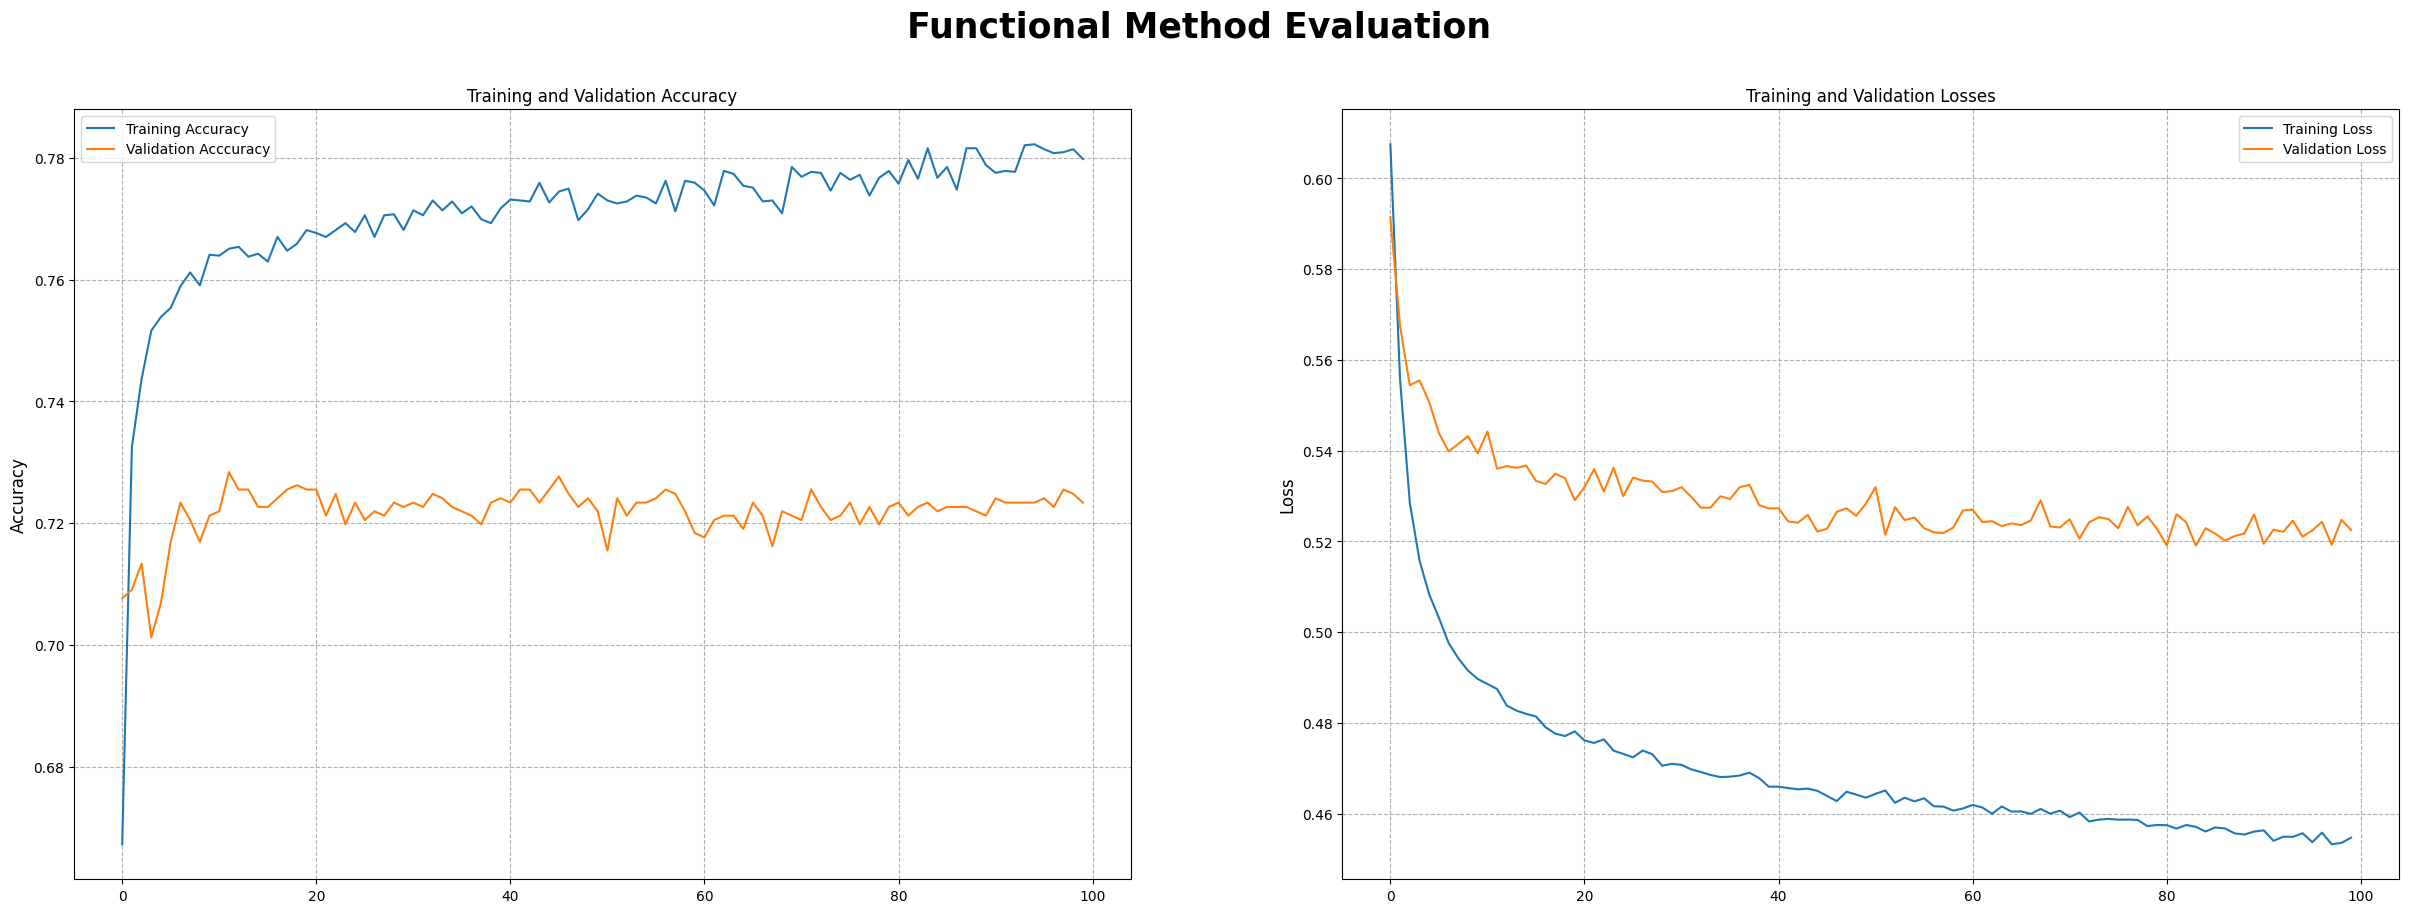

In [77]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(historyS.history['accuracy'], label = "Training Accuracy")
plt.plot(historyS.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(historyS.history['loss'], label = "Training Loss")
plt.plot(historyS.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

In [78]:
# Model prediction
y_predS = model_func.predict(X_test_final)
# keep probabilities for the positive outcome only
y_predS = (y_predS > 0.4)

44/44 [==============================] - 0s 3ms/step


In [79]:
# Check accuracy score
print(f'model 1 accuracy score: {accuracy_score(y_test, y_predS > .5)}')

model 1 accuracy score: 0.6878571428571428


The following are the results of an Artificial Neuron Network that was built using a sequential model, where the number of hidden layers used is 1 with a total of 20 neurons, with the Adamax optimizer and the activation RELU. Based on the loss and accuracy graph above, the model made still tends to be overfitting because the distance between the loss and accuracy line is even wider than the functional model. The accuracy score generated in this model is 0.687. The results of this functional ANN model have not been imported with hyperparameter settings. Thus, an import will be carried out to then compare the results.

# **V. MODEL IMPROVEMENT**

## **1. Functional**

**DEFINITION**

---

In [50]:
# Setting the number of neuron in hidden layers
n_neuronFI = (21, 13, 8, 5)

# Input Layer
inpI = Input(shape=(n_feature, ))
hidden_nI = inpI
# Hidden Layer
for n in n_neuronFI:                             
    hidden_nI = Dense(n, activation='elu')(hidden_nI)
# Output Layer
outI = Dense(1, activation='sigmoid')(hidden_nI)
# Model definition
model_funcI = Model(inputs = inpI, outputs = outI)

In [51]:
# Model summary
model_funcI.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_2 (Dense)             (None, 21)                357       
                                                                 
 dense_3 (Dense)             (None, 13)                286       
                                                                 
 dense_4 (Dense)             (None, 8)                 112       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 806
Trainable params: 806
Non-trainable param

**TRAINING**

---

In [52]:
# Compile the model
model_funcI.compile(loss = 'binary_crossentropy',
                    optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001),
                    metrics = 'accuracy'
)

In [53]:
# Training the model
history_funcI = model_funcI.fit(train_dataset, validation_data = (val_dataset),  epochs=100)

Epoch 1/100
97/97 [==============================] - 2s 5ms/step - loss: 0.7088 - accuracy: 0.4880 - val_loss: 0.7203 - val_accuracy: 0.4196
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5562 - val_loss: 0.6872 - val_accuracy: 0.5061
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6365 - val_loss: 0.6590 - val_accuracy: 0.6319
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6928 - val_loss: 0.6339 - val_accuracy: 0.6934
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.7142 - val_loss: 0.6106 - val_accuracy: 0.7105
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.7238 - val_loss: 0.5904 - val_accuracy: 0.7284
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.7349 - val_loss: 0.5750 - val_accuracy: 0.7441
Epoch 8/100
9

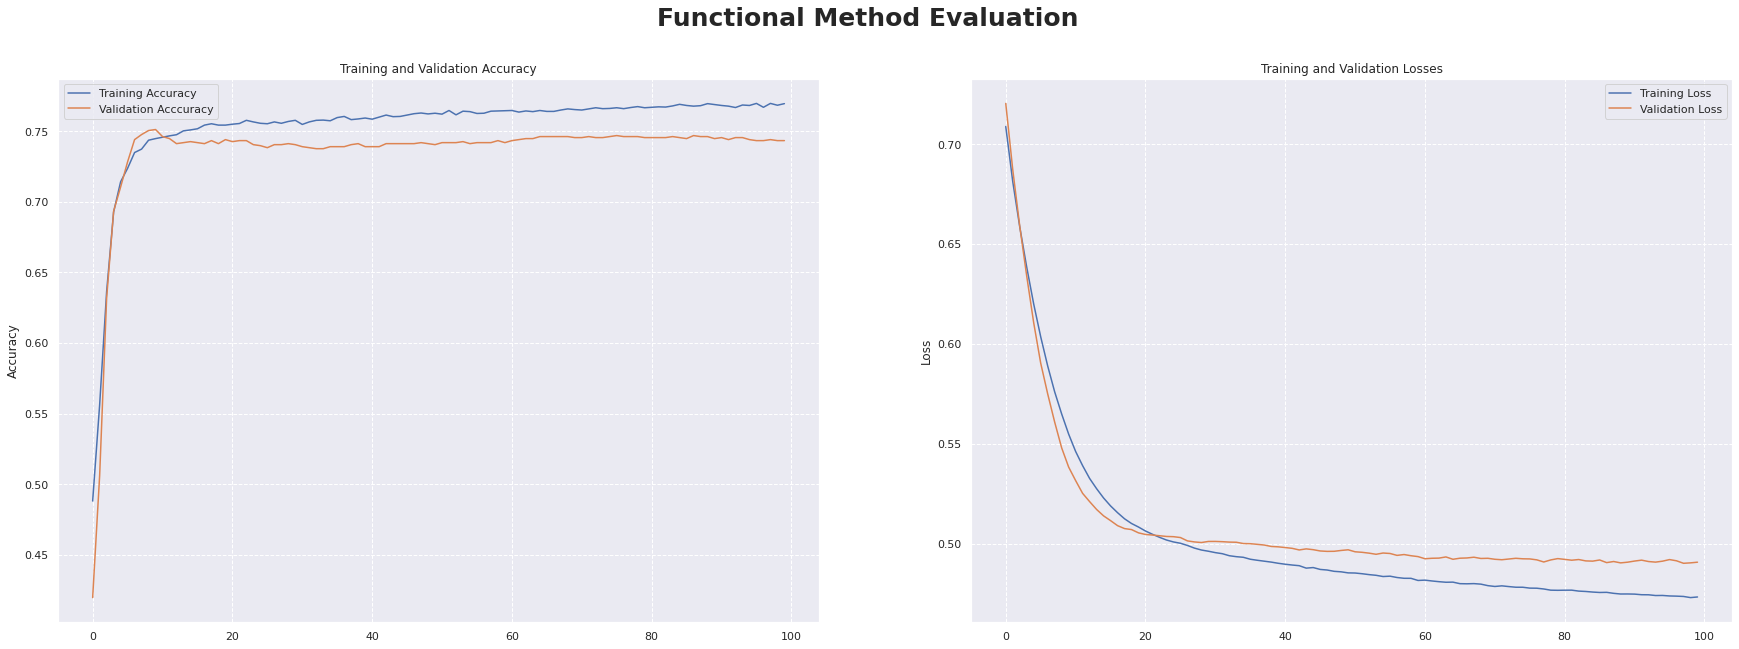

In [54]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_funcI.history['accuracy'],label="Training Accuracy")
plt.plot(history_funcI.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_funcI.history['loss'], label="Training Loss")
plt.plot(history_funcI.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model improvement is done by changing the number of n neurons to 21, 13, 8, and 5 by changing the activation to ELU. The results show that the overfitting tendency is much better, which is indicated by the closer distance between the accuracy and loss lines.

In [55]:
# model freeze
model_funcI.trainable = False

**EVALUATION**

---

In [56]:
# Model prediction
y_predFI = model_funcI.predict(X_test_final)
# keep probabilities for the positive outcome only
y_predFI = (y_predFI > 0.4)

44/44 [==============================] - 0s 3ms/step


<AxesSubplot:>

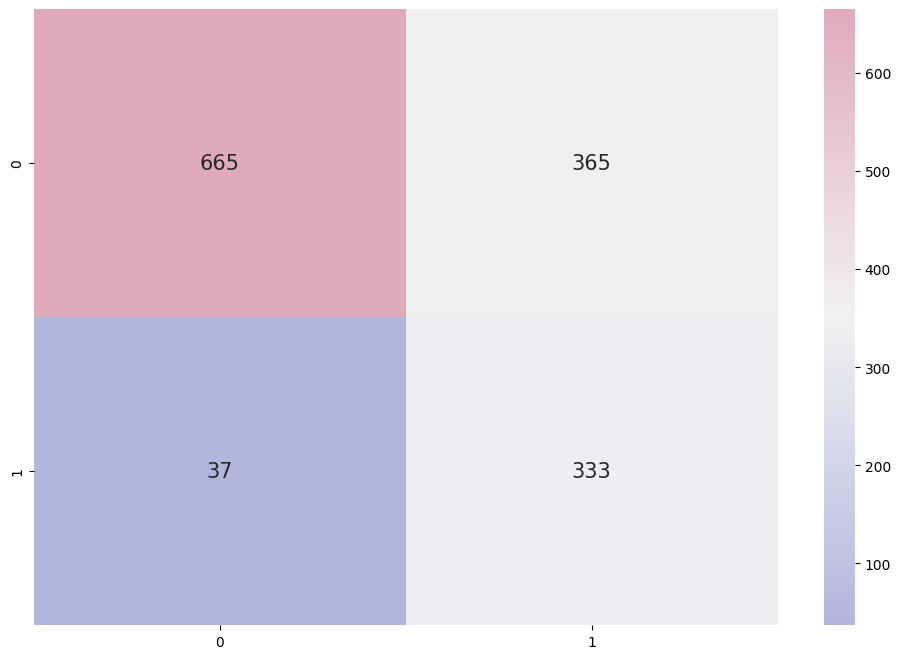

In [57]:
# confusion matrix
cmap3 = sns.diverging_palette(260, -10, s = 50, l = 75, n = 5, as_cmap = True)
plt.subplots(figsize = (12, 8))
cfmFI = confusion_matrix(y_test, y_predFI)
# Heatmap plot
sns.heatmap(cfmFI,
            cmap = cmap3,
            annot = True,
            annot_kws = {'size':15},
            fmt = 'g'
)

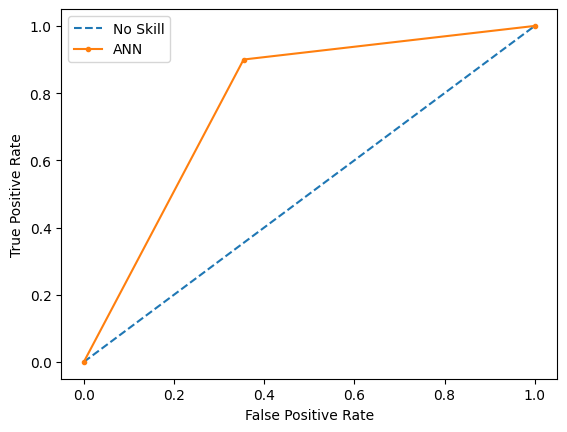

AUC score: 0.7728155339805824


In [58]:
# calculate roc curves & auc
fprFI, tprFI, thresholds = roc_curve(y_test, y_predFI)
aucFI = roc_auc_score(y_test, y_predFI)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.plot(fprFI, tprFI, marker = '.', label = 'ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {aucFI}')

In [59]:
# Evaluation report
print(classification_report(y_test, y_predFI))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1030
           1       0.48      0.90      0.62       370

    accuracy                           0.71      1400
   macro avg       0.71      0.77      0.70      1400
weighted avg       0.82      0.71      0.73      1400



The results of the accuracy of the functional ANN model that has undergone imports show an increase in accuracy. The focus of this analysis is churn cases identified as non-churn. So referring to the false negative, the recall must be used as a reference to the model's performance. Based on the classification report, it is known that recall label 1 already has a fairly good result, which is 0.85.

## **2. Sequential**

**DEFINITION**

---

In [80]:
# Setting the number of neuron in hidden layers
n_neuronSI = (20, 9)
# Model definition
model_seqI = Sequential()
# Input Layer
model_seqI.add(Input(shape = (n_feature, )))      
# Hidden Layer
for n in n_neuronSI:                           
    model_seqI.add(Dense(n, activation='elu'))
# Output Layer
model_seqI.add(Dense(1, activation = 'sigmoid'))   

In [81]:
# Model summary
model_seqI.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                340       
                                                                 
 dense_10 (Dense)            (None, 9)                 189       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 539
Trainable params: 539
Non-trainable params: 0
_________________________________________________________________


**TRAINING**

---

In [82]:
# Compile the model
model_seqI.compile(loss = 'binary_crossentropy',
                   optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0001),
                   metrics = 'accuracy'
)

In [83]:
# Model training
history_seqI = model_seqI.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
97/97 [==============================] - 2s 6ms/step - loss: 0.7564 - accuracy: 0.4963 - val_loss: 0.7459 - val_accuracy: 0.5011
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.7279 - accuracy: 0.5332 - val_loss: 0.7181 - val_accuracy: 0.5247
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.5547 - val_loss: 0.6939 - val_accuracy: 0.5504
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5759 - val_loss: 0.6729 - val_accuracy: 0.5726
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.5978 - val_loss: 0.6551 - val_accuracy: 0.5904
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6245 - val_loss: 0.6380 - val_accuracy: 0.6104
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6431 - val_loss: 0.6225 - val_accuracy: 0.6262
Epoch 8/100
9

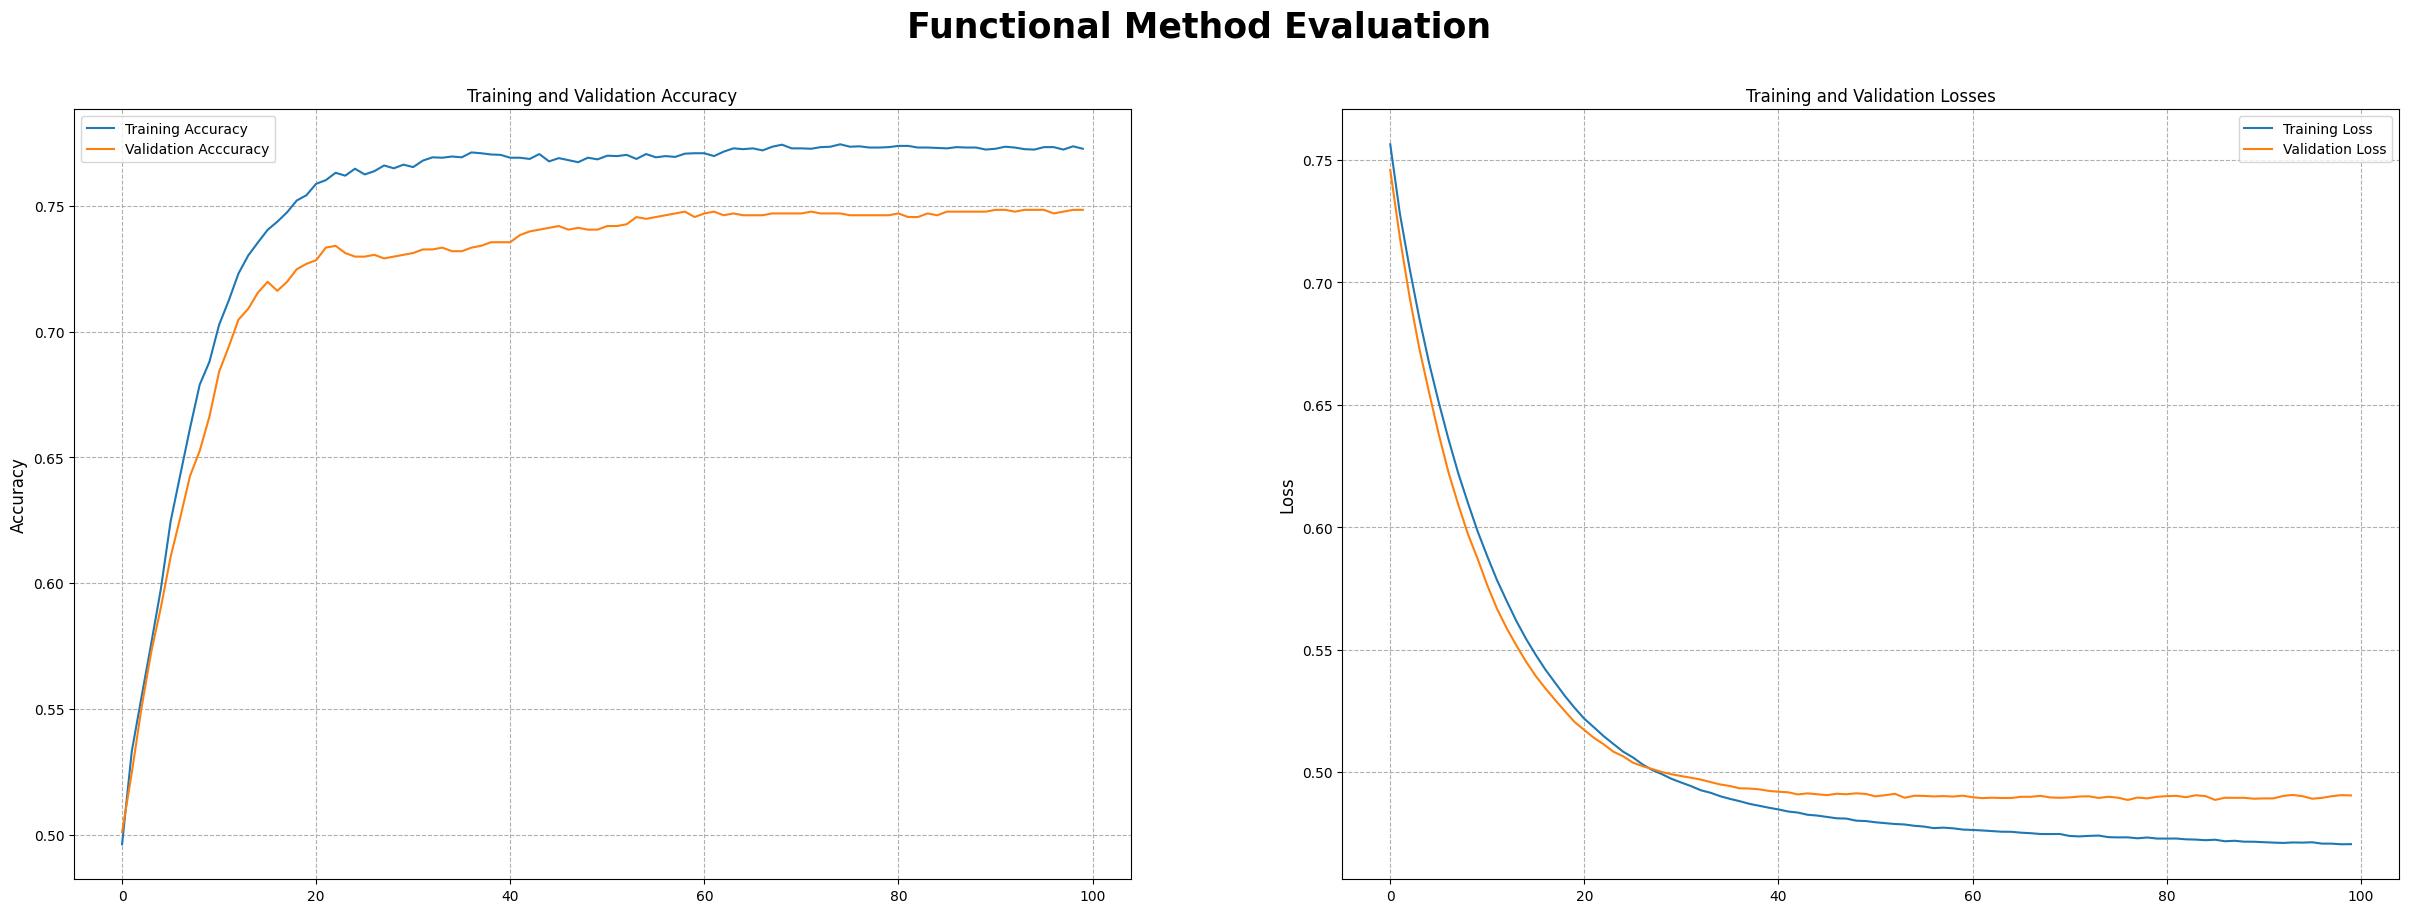

In [84]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seqI.history['accuracy'],label="Training Accuracy")
plt.plot(history_seqI.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seqI.history['loss'], label="Training Loss")
plt.plot(history_seqI.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Improvements made to the sequential ANN model are done by changing n neurons to 20 and 9 and changing the activation to ELU. Based on the graph above, the accuracy and loss lines are very close, even the graph shown is better than the functional model that has undergone improvement.

In [85]:
# model freeze
model_seqI.trainable = False

**EVALUATION**

---

In [86]:
# Model prediction
y_predSI = model_seqI.predict(X_test_final)
# keep probabilities for the positive outcome only
y_predSI = (y_predSI > 0.4)

44/44 [==============================] - 0s 2ms/step


<AxesSubplot:>

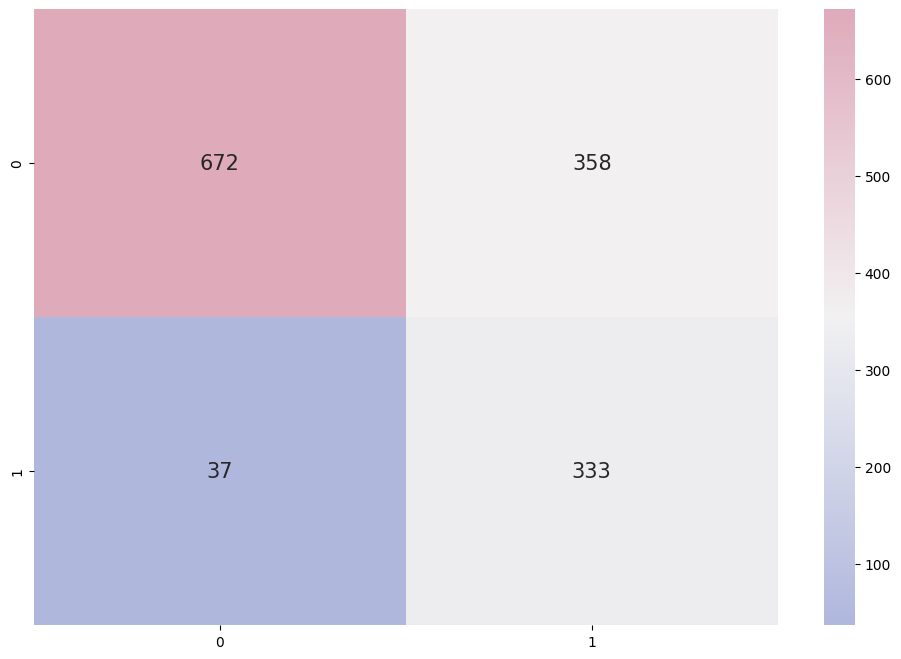

In [87]:
# confusion matrix
cmap4 = sns.diverging_palette(260, -10, s = 50, l = 75, n = 5, as_cmap = True)
plt.subplots(figsize = (12, 8))
cfmSI = confusion_matrix(y_test, y_predSI)
# Heatmap plot
sns.heatmap(cfmSI,
            cmap = cmap3,
            annot = True,
            annot_kws = {'size':15},
            fmt = 'g'
)

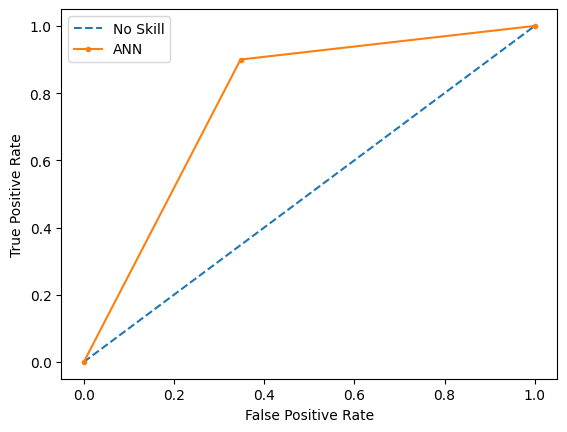

AUC score: 0.7762135922330097


In [88]:
# calculate roc curves & auc
fprSI, tprSI, thresholds = roc_curve(y_test, y_predSI)
aucSI = roc_auc_score(y_test, y_predSI)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.plot(fprSI, tprSI, marker = '.', label = 'ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {aucSI}')

In [89]:
# Evaluation report
print(classification_report(y_test, y_predSI))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1030
           1       0.48      0.90      0.63       370

    accuracy                           0.72      1400
   macro avg       0.71      0.78      0.70      1400
weighted avg       0.82      0.72      0.73      1400



Accuracy results of sequential ANN models that have undergone import show an increase in accuracy. The focus of this analysis is churn cases identified as non-churn. So referring to the false negative, the recall must be used as a reference to the model's performance. Based on the classification report, it is known that recall label 1 already has a fairly good result, which is 0.87. In general, the best model results are obtained by functional models that have experienced improvement with an accuracy of 0.73. Thus, the model will be used as a model that will be used for inference and deployment.

# **VI. MODEL SAVING**

In [90]:
model_seqI.save('churn_predict')

INFO:tensorflow:Assets written to: churn_predict\assets


In [91]:
model_seqI.save('churn_predict.h5')

# **VII. MODEL INFERENCE**

In [92]:
df_inf["SeniorCitizen"].replace(["0", "1"], ["No", "Yes"], inplace = True)

In [93]:
# Preprocessing
df_inf_final = preprocess.transform(df_inf)

In [94]:
# Model prediction
pred_inf = model_funcI.predict(df_inf_final)

1/1 [==============================] - 0s 59ms/step


In [95]:
# Assigning into dataFrame
pred_inf_df = pd.DataFrame(np.round_(pred_inf), columns=['Predicted Churn'])
# Showing the dataframe
pred_inf_df

,Predicted Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
5,1.0
6,1.0
7,0.0
8,0.0
9,0.0


In [96]:
# Convert output labels
pred_inf_df['Predicted Churn'].replace({1 : "Yes", 0 : "No"}, inplace = True)

In [97]:
# Data merging
pd.concat([df_inf, pred_inf_df], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predicted Churn
0,No,Yes,Yes,1,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes,Yes
1,No,No,No,11,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,837.95,Yes,Yes
2,No,No,No,4,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,75.35,273.40,No,Yes
3,No,No,No,37,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,Yes,Yes
4,No,No,No,4,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.30,116.95,No,No
5,No,Yes,Yes,10,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.10,1068.85,Yes,Yes
6,No,No,No,9,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.25,639.65,Yes,Yes
7,No,No,No,71,Fiber optic,Yes,No,No,Yes,No,Yes,One year,No,Credit card (automatic),97.65,6687.85,No,No
8,No,No,No,54,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,No,No
9,No,Yes,Yes,34,DSL,No,No,No,Yes,Yes,No,Two year,Yes,Electronic check,40.55,1325.85,No,No


The results of the inference model carried out show very good results. From a total of 10 new input data, only 1 misclassification occurred, namely No to Yes. This is not very significant because the error does not occur on false positives.

# **VIII. CONCLUSIONS**

Functional and sequential ANN models were built to predict churn that occurred at Telco Co. customers. Accuracy, ROC-AUC, and Recall label 1 are used as a reference to see the performance of the model made. Accuracy and ROC-AUC show the overall model performance, while recall label 1 shows the model's ability to identify churn customers. This means that in the confusion matrix table, the model must anticipate as little as possible the identification error in the churn category or that means minimizing the number of false negatives that occur. Then, improvements were also made to both types of models by changing the number of neurons and the type of activation used. In general, the results of the improvement model show better performance than the default model. However, based on accuracy and ROC-AUC, the ANN functional model that has undergone improvement has the best results compared to the others. The following is a summary of the model's performance.

|Models|Accuracy|ROC-AUC|Recall 1|
|:-----|:-------|:------|:-------|
|Functional Default|0.687|-|-|
|Sequential Default|0.687|-|-|
|Functional Improved|0.73|0.767|0.85|
|Sequential Improved|0.71|0.762|0.87|